# Table of Contents

- [Download the Data](#download-the-data)
- [Data Structure](#data-structure)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Correlation Analysis](#correlation-analysis)
- [Experimenting with Attribute Combinations](#experimenting-with-attribute-combinations)
- [Prepare the Data for Machine Learning Algorithms](#prepare-the-data-for-machine-learning-algorithms)
  - [Handling Text and Categorical Attributes](#handling-text-and-categorical-attributes)
  - [Feature Scaling](#feature-scaling)
  - [Custom Transformers](#custom-transformers)
    - [Simple Custom Transformers with FunctionTransformer](#simple-custom-transformers-with-functiontransformer)
    - [Custom ClusterSimilarity](#custom-clustersimilarity)
- [Feature Encoding & Data Splitting](#feature-encoding-and-data-splitting)
- [Select and Train a Model](#select-and-train-a-model)
  - [Linear Regression Model](#linear-regression-model)
  - [Linear Discriminant Analysis (LDA)](#linear-discriminant-analysis-lda)
  - [Random Forest Regressor](#random-forest-regressor)
  - [Decision Tree Regressor](#decision-tree-regressor)
- [Comparison of Five Models](#comparison-of-five-models)



# Download the Data

In [3]:
import pandas as pd
from pathlib import Path

def load_airbnb_data(csv_path=None):
    """
    Load the Airbnb dataset from a local CSV file, using low_memory=False
    to avoid chunk-based type inference.
    """
    if csv_path is None:
        csv_path = Path(r"C:\Users\thinkbook\Desktop\Airbnb_Open_Data.csv")
    
    df = pd.read_csv(csv_path, low_memory=False)
    return df
    
airbnb = load_airbnb_data()


# Data Structure

In [4]:
# Show the first few rows
airbnb.head()


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [5]:
# Check the overall structure and column types
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
# Get basic statistics for numeric columns
airbnb.describe()


id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

In [7]:
# Check for missing values
airbnb.isnull().sum()


id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
import matplotlib.pyplot as plt
from pathlib import Path

#Create a folder to store figures
IMAGES_PATH = Path("images") / "airbnb_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

#Define a helper function to save figures in high resolution
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save a Matplotlib figure with a given filename (fig_id)
    into the IMAGES_PATH directory in fig_extension format (default .png)
    at the specified resolution (default 300 dpi).
    """
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    print(f"Saving figure {fig_id} as {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

Saving figure airbnb_histograms as images\airbnb_project\airbnb_histograms.png


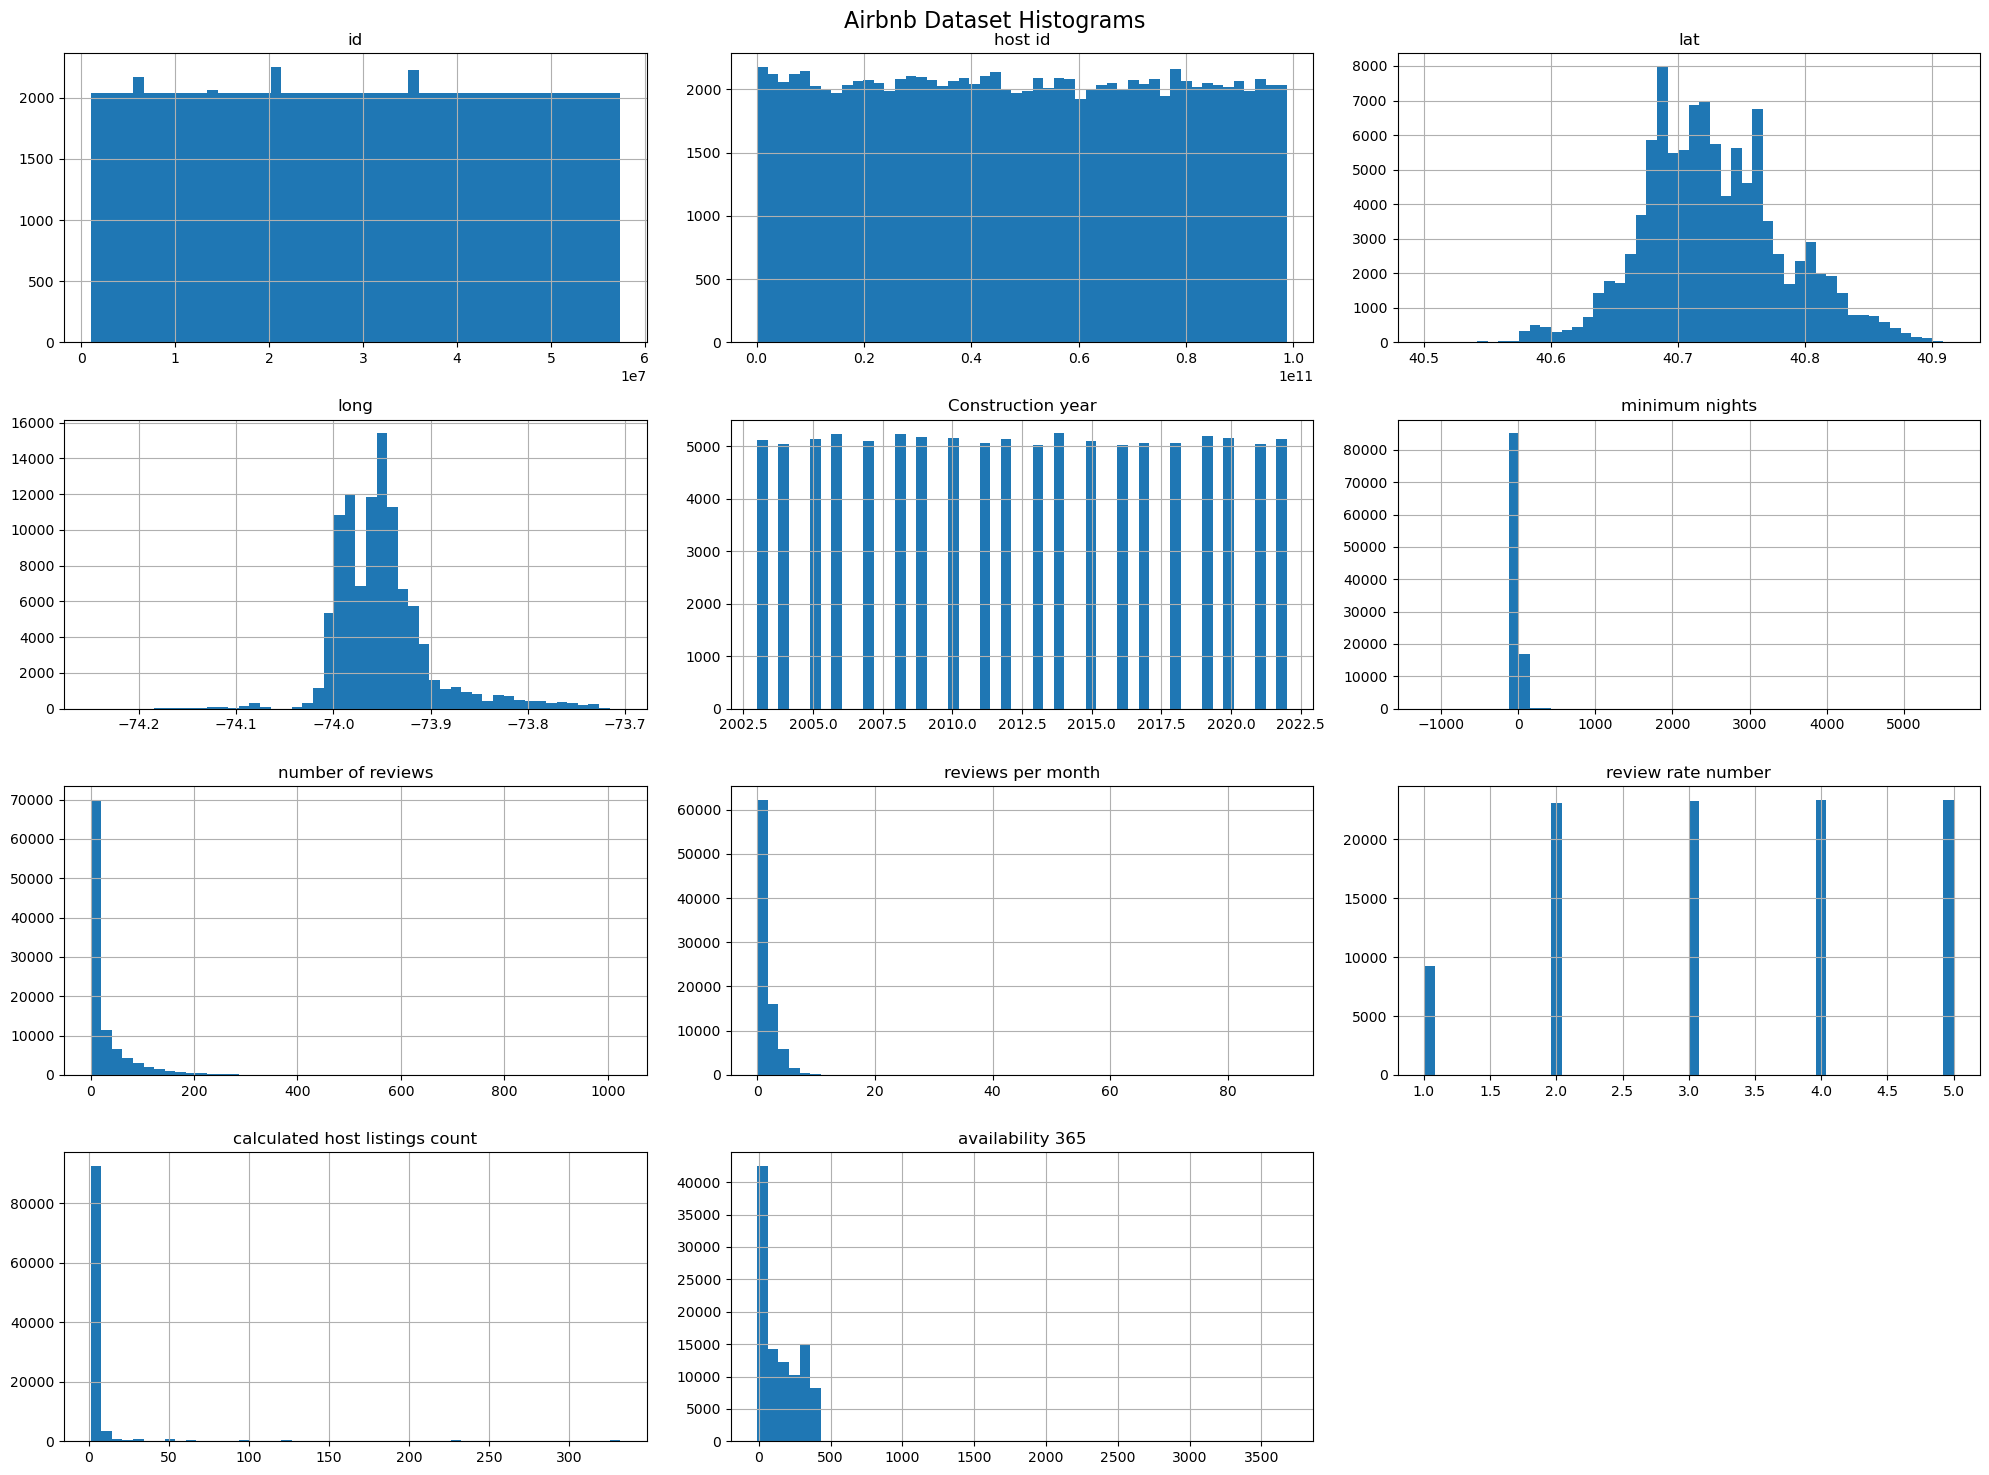

In [9]:
import pandas as pd

# 1. Load the Airbnb dataset into a DataFrame
airbnb_df = pd.read_csv(r"C:\Users\thinkbook\Desktop\Airbnb_Open_Data.csv", low_memory=False)

numeric_cols = airbnb_df.select_dtypes(include=["int", "float"]).columns
airbnb_df[numeric_cols].hist(bins=50, figsize=(20, 15))

plt.suptitle("Airbnb Dataset Histograms", fontsize=16)
save_fig("airbnb_histograms")
plt.show()


# Exploratory Data Analysis

In [10]:
print(airbnb_df.columns)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path("images") / "airbnb_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save a Matplotlib figure with a given filename (fig_id)
    into the IMAGES_PATH directory, in fig_extension format,
    at the specified resolution (default 300 dpi).
    """
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    print(f"Saving figure {fig_id} as {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Saving figure airbnb_geolocation_plot as images\airbnb_project\airbnb_geolocation_plot.png


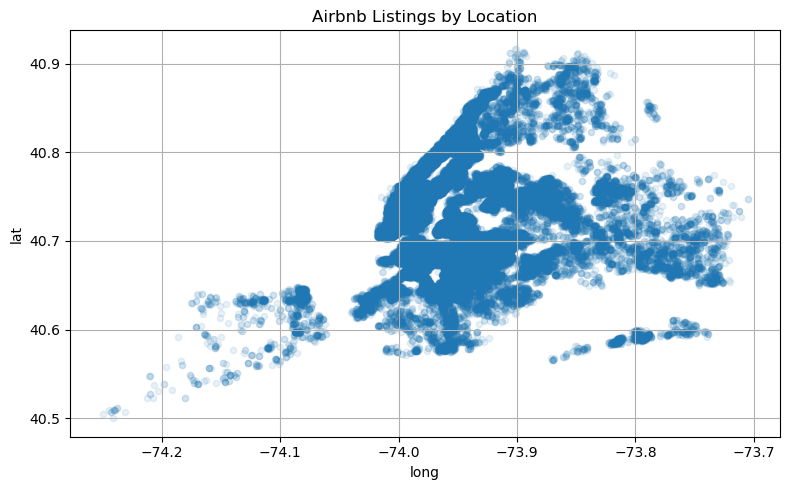

In [12]:

airbnb_df.plot(
    kind="scatter",
    x="long",
    y="lat",
    grid=True,
    alpha=0.1,   
    figsize=(8, 5)
)
plt.title("Airbnb Listings by Location")
save_fig("airbnb_geolocation_plot")  
plt.show()


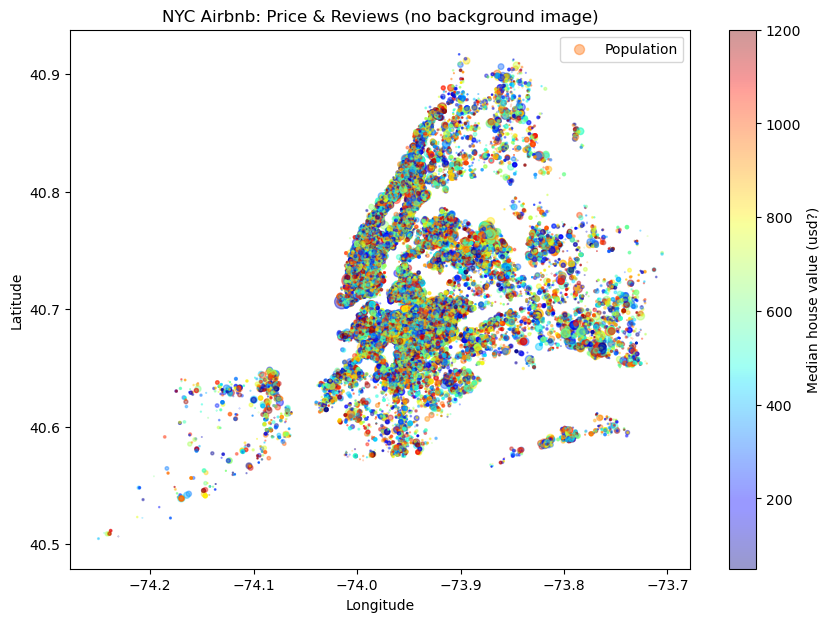

In [18]:
airbnb_renamed = airbnb_df.rename(columns={
    "long": "Longitude",
    "lat": "Latitude",
    "number of reviews": "Population",
    "price": "Median house value (usd?)"
})

airbnb_renamed.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    s=airbnb_renamed["Population"] / 10,         # scale marker size
    label="Population",                          # label for the legend
    c="Median house value (usd?)",               # color by price
    cmap="jet",                                  # color map
    colorbar=True,
    alpha=0.4,
    sharex=False,
    figsize=(10,7)
)

plt.title("NYC Airbnb: Price & Reviews (no background image)")
plt.legend()
plt.show()


count     102352
unique      1151
top        $206 
freq         137
Name: price, dtype: object


<Axes: xlabel='price', ylabel='Count'>

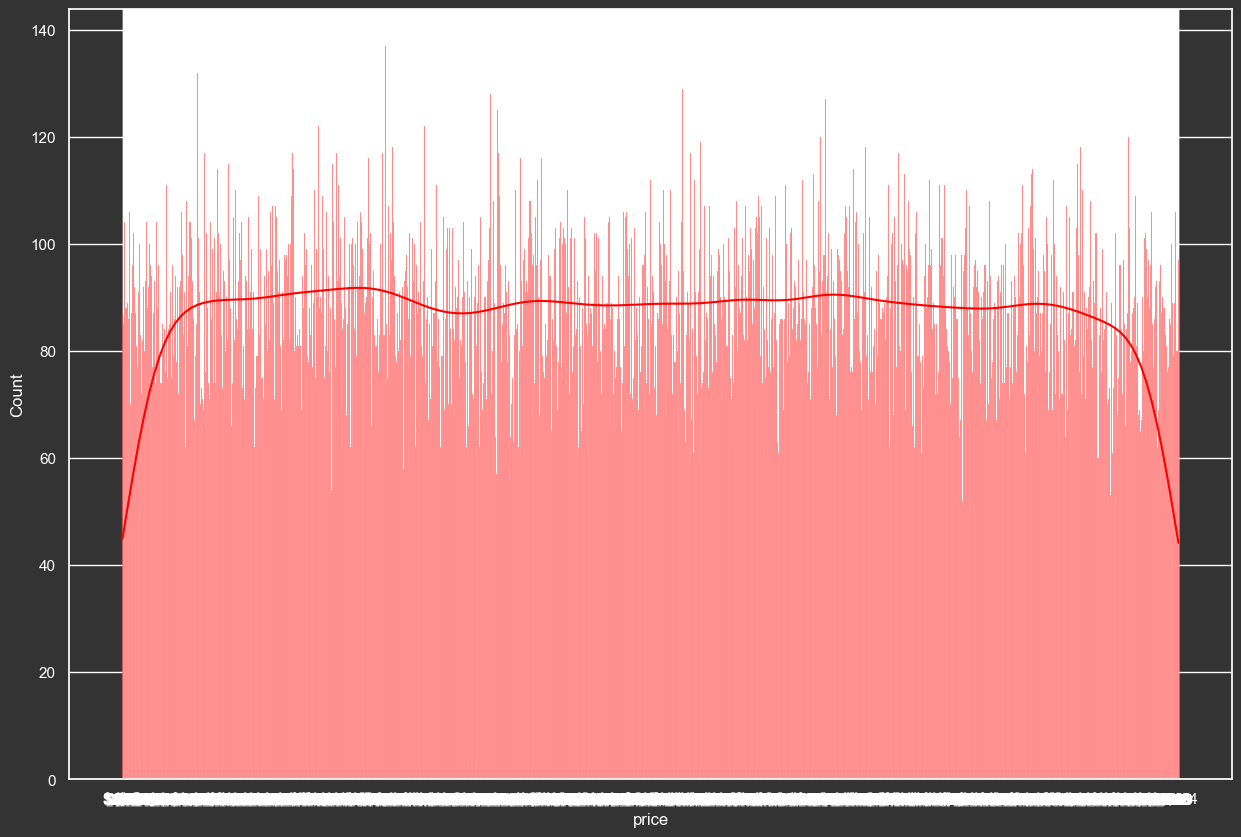

In [43]:
# 1) Display summary stats for the 'price' column
print(airbnb["price"].describe())

# 2) Make a figure with custom size
fig, ax = plt.subplots(figsize=(15, 10))

# 3) Increase the overall font scale in Seaborn
sns.set(font_scale=2)

# 4) Plot a histogram plus KDE line for 'price', using red
sns.histplot(data=airbnb, x="price", kde=True, color="red")


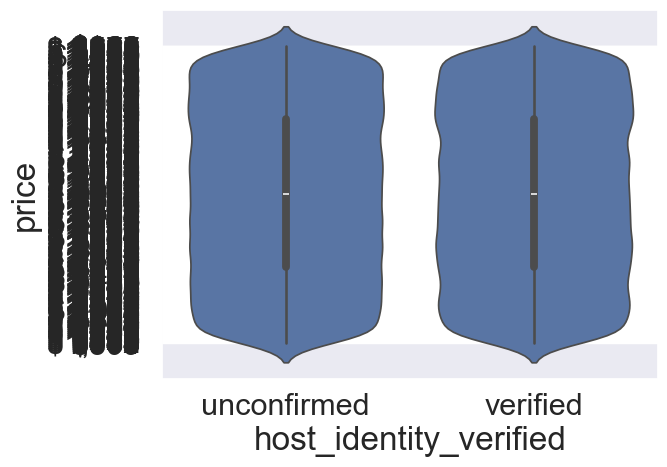

In [44]:
ax = sns.violinplot(
    data=airbnb,
    x="host_identity_verified",
    y="price"
)


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_299272\2853748055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='neighbourhood', ylabel='price'>

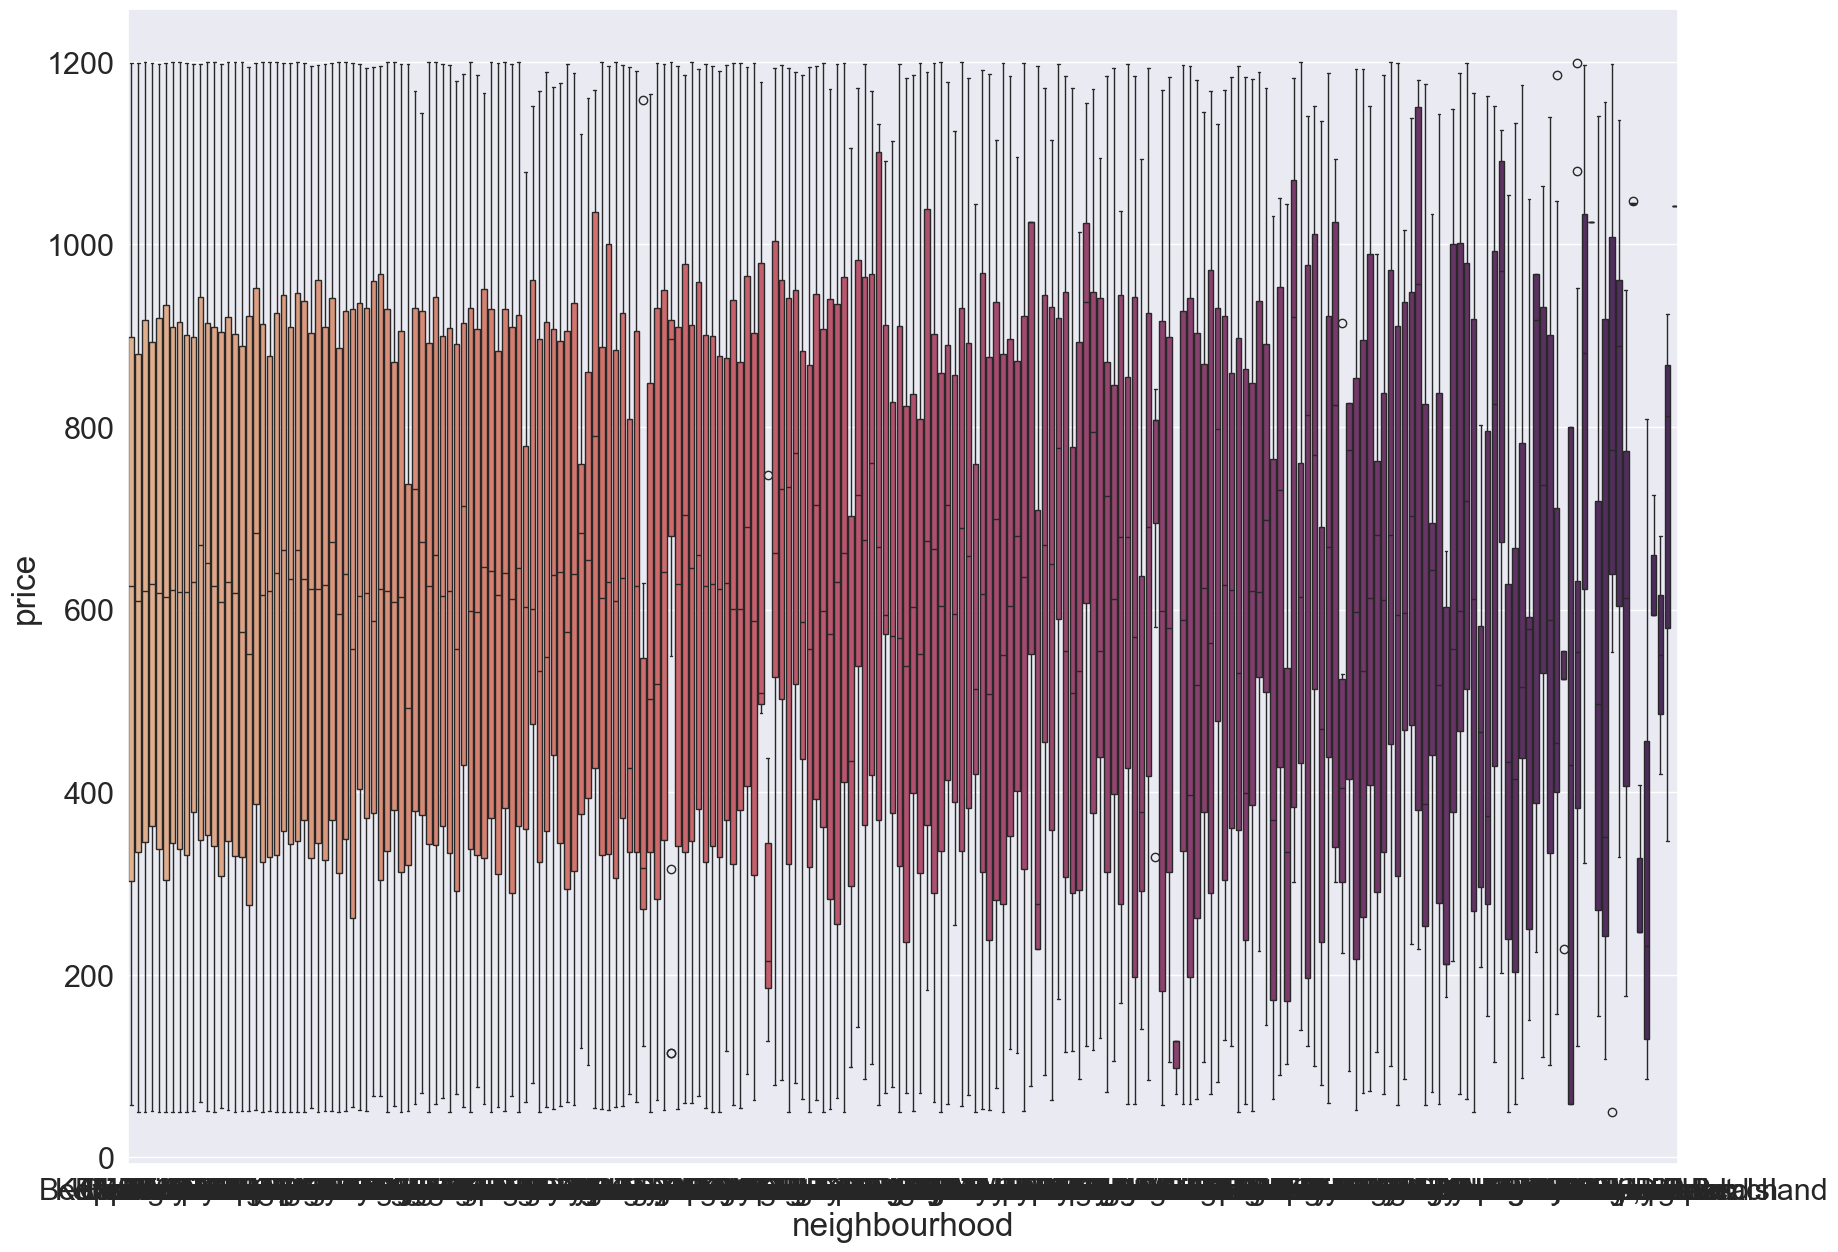

In [48]:
airbnb["price"] = airbnb["price"].astype(str).str.replace(r"[$,]", "", regex=True)

# Convert to numeric
airbnb["price"] = pd.to_numeric(airbnb["price"], errors="coerce")

fig, ax = plt.subplots(figsize=(20, 15))

sns.set(font_scale=2)

sns.boxplot(
    data=airbnb,
    x="neighbourhood",
    y="price",
    palette="flare",
    ax=ax
)


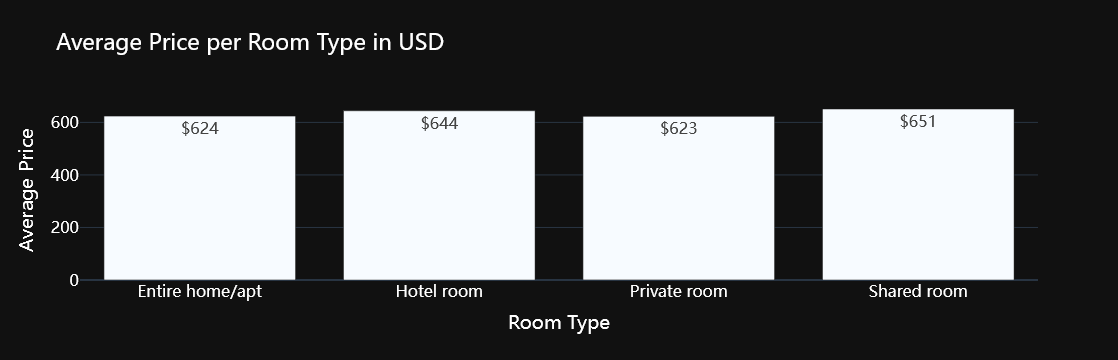

In [51]:
# Remove currency symbols, commas, etc. if needed
airbnb["price"] = airbnb["price"].astype(str).str.replace(r"[$,]", "", regex=True)

# Convert to numeric
airbnb["price"] = pd.to_numeric(airbnb["price"], errors="coerce")

fig = px.bar(
    x=price_per_room_type.index,
    y=price_per_room_type.values,
    labels={"x": "Room Type", "y": "Average Price"},
    text=["$" + str(int(val)) for val in price_per_room_type.values],
    title="Average Price per Room Type in USD",
    color_discrete_sequence=px.colors.sequential.Blues,  # changed from Bluel
    template="plotly_dark"
)
fig.update_layout(
    font=dict(size=16, color="white", family="Avenir")
)

fig.show()

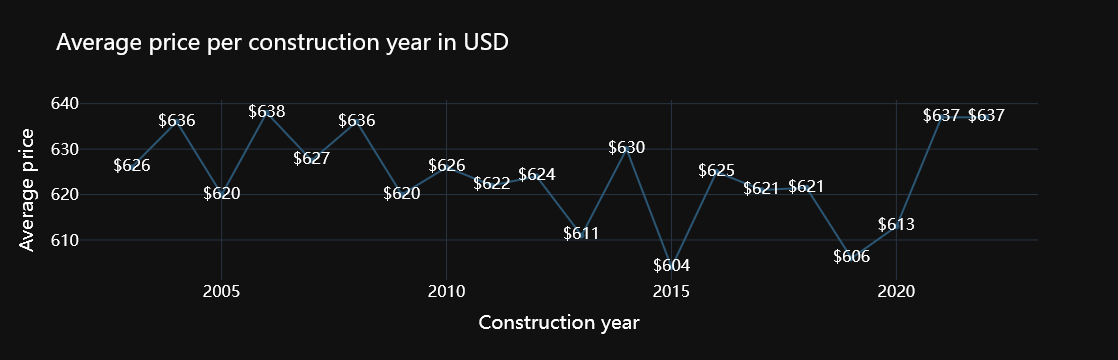

In [52]:
# Compute the median price by construction year
price_per_year = airbnb.groupby("Construction year")["price"].median()

# Create a line plot
fig = px.line(
    x=price_per_year.index,
    y=price_per_year.values,
    labels={"x": "Construction year", "y": "Average price"},
    text=["$" + str(int(val)) for val in price_per_year.values],
    title="Average price per construction year in USD",
    color_discrete_sequence=px.colors.sequential.Teal_r,
    template="plotly_dark"
)

# Update the layout with larger white text in Avenir font
fig.update_layout(
    font=dict(size=16, color="white", family="Avenir")
)

fig.show()


# Correlation Analysis

In [19]:
airbnb_df.info()  # or
print(airbnb_df.select_dtypes(include=[int, float]).columns)


<class 'pandas.core.frame.DataFrame'>
Index: 102352 entries, 0 to 102598
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              102352 non-null  int64   
 1   NAME                            102105 non-null  object  
 2   host id                         102352 non-null  int64   
 3   host_identity_verified          102067 non-null  object  
 4   host name                       101951 non-null  object  
 5   neighbourhood group             102324 non-null  object  
 6   neighbourhood                   102337 non-null  object  
 7   lat                             102344 non-null  float64 
 8   long                            102344 non-null  float64 
 9   country                         101825 non-null  object  
 10  country code                    102226 non-null  object  
 11  instant_bookable                102252 non-null  object  
 12  cancell

In [20]:
corr_matrix = airbnb_df.corr(numeric_only=True)
corr_matrix


id   host id       lat      long  \
id                              1.000000 -0.000719 -0.008803  0.042681   
host id                        -0.000719  1.000000  0.000659 -0.008955   
lat                            -0.008803  0.000659  1.000000  0.074201   
long                            0.042681 -0.008955  0.074201  1.000000   
Construction year               0.001132  0.004718  0.005747  0.000887   
price                           0.006739  0.003837 -0.005900  0.003269   
minimum nights                  0.005610 -0.002318  0.014818 -0.039584   
number of reviews              -0.041111 -0.004311 -0.025317  0.069078   
reviews per month               0.038261 -0.001640 -0.019488  0.118421   
review rate number              0.036480  0.003591 -0.003917  0.015402   
calculated host listings count  0.023960  0.001720  0.032544 -0.104626   
availability 365               -0.138895 -0.002170 -0.005140  0.058513   

                                Construction year     price  minimum nights  \
id                                       0.001132  0.006739        0.005610   
host id                                  0.004718  0.003837       -0.002318   
lat                                      0.005747 -0.005900        0.014818   
long                                     0.000887  0.003269       -0.039584   
Construction year                        1.000000 -0.003753       -0.000207   
price                                   -0.003753  1.000000       -0.003471   
minimum nights                          -0.000207 -0.003471        1.000000   
number of reviews                        0.001879  0.005229       -0.049810   
reviews per month                        0.004115  0.004186       -0.095893   
review rate number                       0.005033 -0.004576       -0.002379   
calculated host listings count          -0.002669 -0.000106        0.084450   
availability 365                        -0.008734 -0.002833        0.063585   

                                number of reviews  reviews per month  \
id                                      -0.041111           0.038261   
host id                                 -0.004311          -0.001640   
lat                                     -0.025317          -0.019488   
long                                     0.069078           0.118421   
Construction year                        0.001879           0.004115   
price                                    0.005229           0.004186   
minimum nights                          -0.049810          -0.095893   
number of reviews                        1.000000           0.590829   
reviews per month                        0.590829           1.000000   
review rate number                      -0.018174           0.037805   
calculated host listings count          -0.080766          -0.025240   
availability 365                         0.099483           0.077250   

                                review rate number  \
id                                        0.036480   
host id                                   0.003591   
lat                                      -0.003917   
long                                      0.015402   
Construction year                         0.005033   
price                                    -0.004576   
minimum nights                           -0.002379   
number of reviews                        -0.018174   
reviews per month                         0.037805   
review rate number                        1.000000   
calculated host listings count            0.024126   
availability 365                         -0.006035   

                                calculated host listings count  \
id                                                    0.023960   
host id                                               0.001720   
lat                                                   0.032544   
long                                                 -0.104626   
Construction year                                    -0.002669   
price      

In [21]:
corr_with_price = corr_matrix["price"].sort_values(ascending=False)
print(corr_with_price)


price                             1.000000
id                                0.006739
number of reviews                 0.005229
reviews per month                 0.004186
host id                           0.003837
long                              0.003269
calculated host listings count   -0.000106
availability 365                 -0.002833
minimum nights                   -0.003471
Construction year                -0.003753
review rate number               -0.004576
lat                              -0.005900
Name: price, dtype: float64


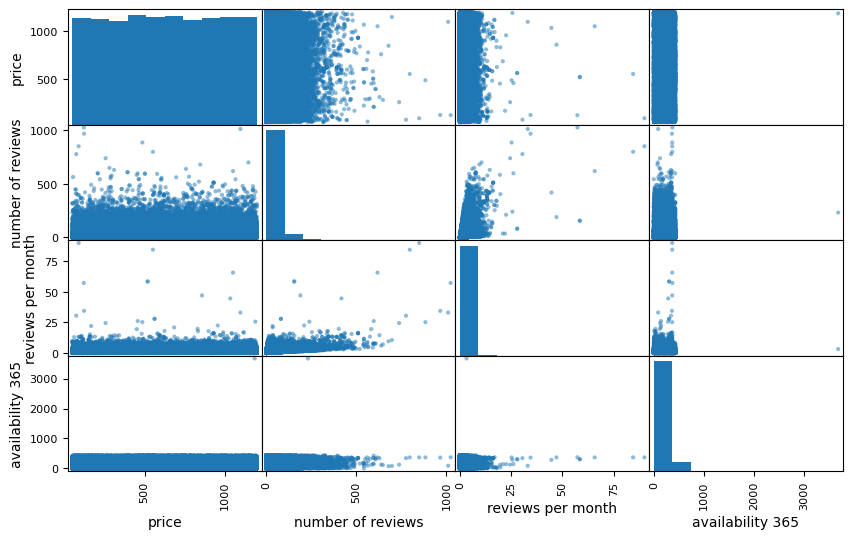

In [22]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["price", "number of reviews", "reviews per month", "availability 365"]
scatter_matrix(airbnb_df[attributes], figsize=(10, 6))
plt.show()


In [23]:
import numpy as np

# Create log transforms of price, reviews, etc.
airbnb_df["log_price"] = np.log1p(airbnb_df["price"])  # log(1 + price)
airbnb_df["log_reviews"] = np.log1p(airbnb_df["number of reviews"])

corr_matrix = airbnb_df[["log_price", "log_reviews", "reviews per month", "availability 365"]].corr()
print(corr_matrix)


                   log_price  log_reviews  reviews per month  availability 365
log_price           1.000000     0.006603           0.005572         -0.003006
log_reviews         0.006603     1.000000           0.583564          0.092384
reviews per month   0.005572     0.583564           1.000000          0.077250
availability 365   -0.003006     0.092384           0.077250          1.000000


In [24]:
from scipy.stats import spearmanr

# Spearman correlation for two columns:
rho, p_val = spearmanr(airbnb_df["log_price"], airbnb_df["log_reviews"])
print("Spearman correlation:", rho, "p-value:", p_val)
cols = ["log_price", "log_reviews", "reviews per month", "availability 365"]
spearman_matrix = airbnb_df[cols].corr(method="spearman")
print(spearman_matrix)


Spearman correlation: nan p-value: nan
                   log_price  log_reviews  reviews per month  availability 365
log_price           1.000000     0.004626           0.003455         -0.003471
log_reviews         0.004626     1.000000           0.741117          0.135982
reviews per month   0.003455     0.741117           1.000000          0.164875
availability 365   -0.003471     0.135982           0.164875          1.000000


In [25]:
# 1) Filter out rows where price <= 0 or number_of_reviews < 0 (if that’s nonsensical)
airbnb_df = airbnb_df[airbnb_df["price"] > 0]

# 2) Create log columns
airbnb_df["log_price"] = np.log1p(airbnb_df["price"])  # log(1+price)
airbnb_df["log_reviews"] = np.log1p(airbnb_df["number of reviews"].clip(lower=0))

# 3) Drop rows with NaNs or Infs in those columns
airbnb_df = airbnb_df.dropna(subset=["log_price", "log_reviews"])
airbnb_df = airbnb_df[~np.isinf(airbnb_df["log_price"])]
airbnb_df = airbnb_df[~np.isinf(airbnb_df["log_reviews"])]

# 4) Check final counts
print(airbnb_df["log_price"].describe())
print(airbnb_df["log_reviews"].describe())

# 5) Now compute Spearman
from scipy.stats import spearmanr
rho, p_val = spearmanr(airbnb_df["log_price"], airbnb_df["log_reviews"])
print("Spearman correlation:", rho, "p-value:", p_val)


count    102169.000000
mean          6.232165
std           0.732545
min           3.931826
25%           5.831882
50%           6.437752
75%           6.817831
max           7.090910
Name: log_price, dtype: float64
count    102169.000000
mean          2.211222
std           1.561736
min           0.000000
25%           0.693147
50%           2.079442
75%           3.433987
max           6.932448
Name: log_reviews, dtype: float64
Spearman correlation: 0.004625644094566676 p-value: 0.1392671986602796


A near-zero Spearman correlation (0.0046) with a p-value above 0.05 indicates that log_price and log_reviews do not exhibit a significant monotonic relationship. This outcome is fairly common in Airbnb datasets, where listing prices are often more strongly influenced by factors such as neighborhood, room type, and other location-specific or categorical variables rather than the raw number of reviews. Consequently, to better understand which features truly drive price, one should explore neighborhood and room type or employ a machine learning model, such as a random forest or gradient boosting regressor to assess feature importances and uncover the most influential attributes.











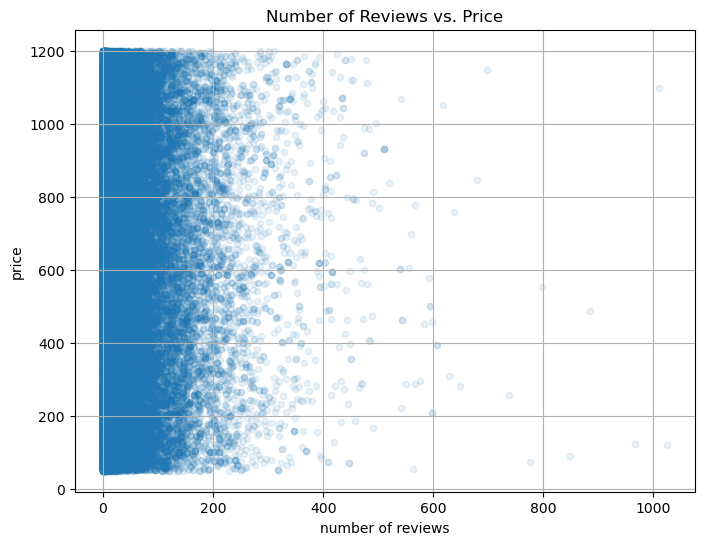

In [26]:
import matplotlib.pyplot as plt

airbnb_df.plot(
    kind="scatter",
    x="number of reviews",  # your chosen x-axis column
    y="price",              # your chosen y-axis column
    alpha=0.1,              # transparency so dense areas are visible
    grid=True,              # shows a grid background
    figsize=(8, 6)          # optional: adjust figure size
)

plt.title("Number of Reviews vs. Price")
plt.show()


Many listings have relatively few reviews (0–50), suggesting they’re either new or rarely booked, yet they span nearly the full range of prices, indicating that both cheap and expensive listings can have few reviews. There’s no strong upward or downward slope in the data—listings with many reviews (200+) still appear at various price points, aligning with the near-zero correlation observed earlier. In other words, number of reviews alone doesn’t predict price. Instead, price often depends on factors like location (e.g., neighborhood), room type (entire home vs. private room), and how long the listing has been active. Additionally, the x-axis (number of reviews) and y-axis (price) both appear heavily skewed, potentially obscuring subtle patterns. While a log transform (log(1 + reviews) vs. log(1 + price)) can sometimes clarify such relationships, little correlation was found in this case, reinforcing that there’s no straightforward relationship between price and number of reviews alone. Overall, there is no straightforward relationship between price and number of reviews alone. A more comprehensive approach, such as a regression or machine learning model that includes room type, location, and other listing attributes can offer deeper insight into which features truly drive price.








# Experimenting with Attribute Combinations

price                             1.000000
log_price                         0.939741
price_per_night_ratio             0.530361
id                                0.006733
number of reviews                 0.005229
log_reviews                       0.004933
reviews per month                 0.004071
host id                           0.003816
reviews_per_host_listing          0.003364
long                              0.003243
calculated host listings count   -0.000070
availability 365                 -0.002942
minimum nights                   -0.003448
Construction year                -0.003865
review rate number               -0.004629
lat                              -0.005841
Name: price, dtype: float64


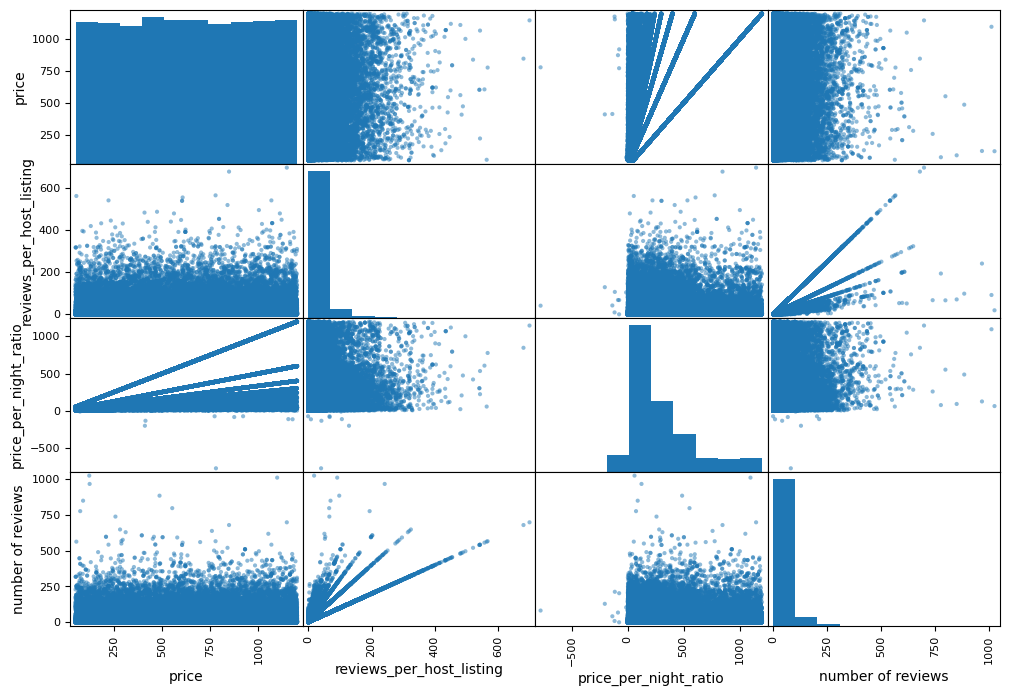

In [27]:
# 1) Create new combos
airbnb_df["reviews_per_host_listing"] = (
    airbnb_df["number of reviews"] / airbnb_df["calculated host listings count"].replace(0, 1)
)

airbnb_df["price_per_night_ratio"] = (
    airbnb_df["price"] / airbnb_df["minimum nights"].replace(0, 1)
)

# 2) Correlation with price
corr_matrix = airbnb_df.corr(numeric_only=True)
corr_with_price = corr_matrix["price"].sort_values(ascending=False)
print(corr_with_price)

# 3) Scatter matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["price", "reviews_per_host_listing", "price_per_night_ratio", "number of reviews"]
scatter_matrix(airbnb_df[attributes], figsize=(12, 8))
plt.show()


High correlation with price_per_night_ratio is expected because it’s partly derived from price. Dividing price by minimum_nights naturally creates a feature that moves in sync with price.

# Prepare the Data for Machine Learning Algorithms

It cover separating labels, handling missing values, and using scikit-learn’s SimpleImputer to fill in missing numeric attributes.

In [28]:
# 1) Separate target
airbnb_df_features = airbnb_df.drop("price", axis=1)
airbnb_df_labels = airbnb_df["price"].copy()

# 2) Select numeric columns
airbnb_num = airbnb_df_features.select_dtypes(include=[int, float]).copy()

# 3) Use SimpleImputer to fill missing numeric data with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(airbnb_num)

# 4) Transform
X = imputer.transform(airbnb_num)
airbnb_num_tr = pd.DataFrame(X, columns=airbnb_num.columns, index=airbnb_num.index)

# 5) Check a few rows that had NaNs
null_rows_idx = airbnb_num.isnull().any(axis=1)
airbnb_num_tr.loc[null_rows_idx].head()

# 6) Now airbnb_num_tr has no NaNs in numeric columns


id       host id       lat      long  Construction year  \
2   1002403.0  7.882924e+10  40.80902 -73.94190             2005.0   
20  1012382.0  7.980514e+10  40.79685 -73.94872             2013.0   
27  1016248.0  3.881142e+10  40.86754 -73.92639             2017.0   
28  1016800.0  1.938280e+10  40.76715 -73.98533             2016.0   
29  1017353.0  5.144916e+10  40.86482 -73.92106             2021.0   

    minimum nights  number of reviews  reviews per month  review rate number  \
2              3.0                0.0               0.74                 5.0   
20             7.0                0.0               0.74                 3.0   
27             4.0                0.0               0.74                 3.0   
28            10.0               58.0               0.49                 3.0   
29             3.0              108.0               1.11                 3.0   

    calculated host listings count  availability 365  log_price  log_reviews  \
2                              1.0             352.0   6.431331     0.000000   
20                             2.0             347.0   5.641907     0.000000   
27                             1.0              96.0   5.616771     0.000000   
28                             1.0             103.0   5.347108     4.077537   
29                             3.0             172.0   6.070738     4.691348   

    reviews_per_host_listing  price_per_night_ratio  
2                        0.0             206.666667  
20                       0.0              40.142857  
27                       0.0              68.500000  
28                      58.0              20.900000  
29                      36.0             144.000000

In [145]:
# Remove rows where critical values are missing
drop_columns = [
    ['price', 'NAME', 'host_identity_verified'],
    ['neighbourhood_group', 'neighbourhood'],
    ['cancellation_policy'],
    ['instant_bookable', 'host name', 'Construction year'],
    ['lat', 'long']
]

for cols in drop_columns:
    airbnb = airbnb.dropna(subset=cols)
# Identify missing values in each column and arrange them in ascending order
missing_values = airbnb.isna().sum().sort_values()
missing_values







id                                    0
calculated host listings count        0
review rate number                    0
reviews per month                     0
last review                           0
number of reviews                     0
minimum nights                        0
service fee                           0
price                                 0
Construction year                     0
availability 365                      0
room type                             0
instant_bookable                      0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
cancellation_policy                   0
house_rules                       51523
dtype: int64

In [146]:
# Ensure 'price' column is a string before applying string operations
airbnb["price"] = airbnb["price"].astype(str).str.replace(r"[$,]", "", regex=True).astype(float)

airbnb['price']


0          966.0
1          142.0
4          204.0
5          577.0
7         1060.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 101133, dtype: float64

In [148]:
# Ensure 'service fee' column is a string before applying string operations
airbnb["service fee"] = airbnb["service fee"].astype(str).str.replace(r"[$,]", "", regex=True).astype(float)
# Remove columns that contain only a single unique value
unique_value_cols = [col for col in airbnb.columns if airbnb[col].nunique() == 1]
airbnb.drop(columns=unique_value_cols, inplace=True)

# Replace missing values in 'service fee' column with 0 using 
airbnb.loc[:, 'service fee'] = airbnb['service fee'].fillna(0)

airbnb['service fee']



0         193.0
1          28.0
4          41.0
5         115.0
7         212.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service fee, Length: 101133, dtype: float64

In [151]:
# Correct negative values in 'availability 365'
airbnb["availability 365"] = np.where(airbnb["availability 365"] < 0, 
                                      abs(airbnb["availability 365"]), 
                                      airbnb["availability 365"])

# Cap 'availability 365' to a maximum of 365 days
airbnb["availability 365"] = np.minimum(airbnb["availability 365"], 365)

# Ensure 'minimum nights' has no negative values
airbnb["minimum nights"] = np.where(airbnb["minimum nights"] < 0, 
                                    abs(airbnb["minimum nights"]), 
                                    airbnb["minimum nights"])



In [152]:
# Update column name for easier handling
airbnb.rename(columns={'neighbourhood group': 'neighbourhood_group'}, inplace=True)

# Exclude entries where the neighbourhood group is 'brookln' (considered an outlier)
airbnb = airbnb[airbnb['neighbourhood_group'] != 'brookln']

# Display the count of missing values in each column, sorted in ascending order
airbnb.isna().sum().sort_values()


id                                    0
calculated host listings count        0
review rate number                    0
reviews per month                     0
last review                           0
number of reviews                     0
minimum nights                        0
service fee                           0
price                                 0
Construction year                     0
availability 365                      0
room type                             0
instant_bookable                      0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
cancellation_policy                   0
house_rules                       51523
dtype: int64

In [153]:
# Remove negative or zero values in "minimum nights" or "availability 365"
mask = (airbnb_df["minimum nights"] > 0) & (airbnb_df["availability 365"] >= 0)
airbnb_df = airbnb_df[mask].copy()

# Drop rows missing lat/long
airbnb_df = airbnb_df.dropna(subset=["lat", "long"]).copy()

if "NAME" in airbnb_df.columns:
    airbnb_df.drop(columns=["NAME"], inplace=True)

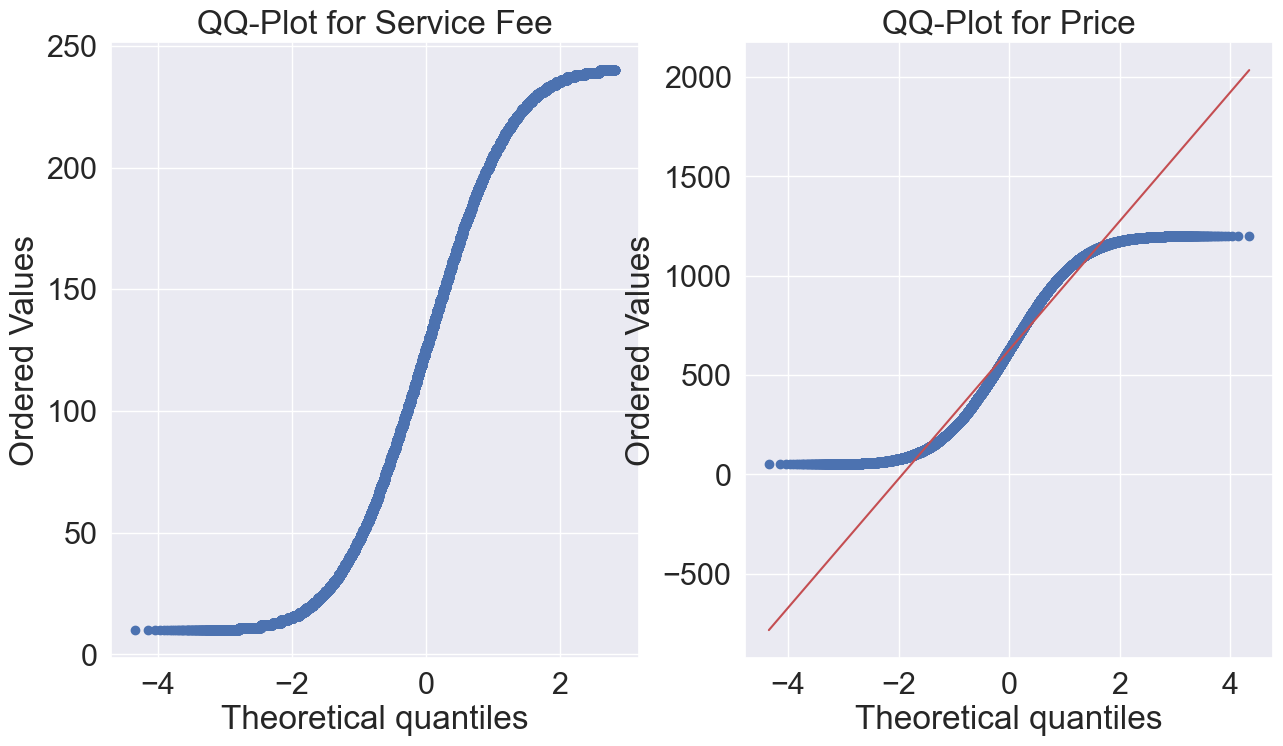

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import probplot

fig, ax = plt.subplots(1, 2, figsize=(15,8))

probplot(airbnb_df["service fee"], plot=ax[0], fit=True)
ax[0].set_title("QQ-Plot for Service Fee")

probplot(airbnb_df["price"], plot=ax[1], fit=True)
ax[1].set_title("QQ-Plot for Price")

plt.show()



In [155]:
features_for_outlier = ["price", "number of reviews", "availability 365"]

# Create a filtered DataFrame with no NaNs in those columns
airbnb_df_no_na = airbnb_df.dropna(subset=features_for_outlier)

# Isolate X for fitting the IsolationForest
X = airbnb_df_no_na[features_for_outlier].copy()

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42, contamination=0.02)
iso_forest.fit(X)  # This should work now, as X has no NaNs

outlier_pred = iso_forest.predict(X)


In [156]:
import numpy as np

# outlier_pred == -1 means "outlier"; == 1 means "inlier"
outlier_count = np.sum(outlier_pred == -1)
inlier_count = np.sum(outlier_pred == 1)
print("Outliers flagged:", outlier_count)
print("Inliers:", inlier_count)
print("Proportion of outliers:", outlier_count / (outlier_count + inlier_count))


Outliers flagged: 2019
Inliers: 98926
Proportion of outliers: 0.02000099063846649


In [157]:
# Keep only the inlier rows (pred == 1)
airbnb_df_cleaned = airbnb_df_no_na.iloc[outlier_pred == 1].copy()

print("Original size (no NaNs):", len(airbnb_df_no_na))
print("Cleaned size:", len(airbnb_df_cleaned))


Original size (no NaNs): 100945
Cleaned size: 98926


# Handling Text and Categorical Attributes


In [56]:
print(airbnb_df.columns)
airbnb_df.select_dtypes(include=["object"]).head()


Index(['id', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'price_cat', 'log_price',
       'log_reviews', 'reviews_per_host_listing', 'price_per_night_ratio'],
      dtype='object')


host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

         country country code instant_bookable cancellation_policy  \
0  United States           US            False              strict   
1  United States           US            False            moderate   
2  United States           US             True            flexible   
3  United States           US             True            moderate   
4  United States           US            False            moderate   

         room type last review  \
0     Private room  10/19/2021   
1  Entire home/apt   5/21/2022   
2     Private room         NaN   
3  Entire home/apt    7/5/2019   
4  Entire home/apt  11/19/2018   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN

In [57]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
airbnb_roomtype_encoded = ord_encoder.fit_transform(airbnb_df[["room type"]])

print("Encoded array:\n", airbnb_roomtype_encoded[:10])
print("Categories_:\n", ord_encoder.categories_)


Encoded array:
 [[2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]]
Categories_:
 [array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)]


In [58]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)  # set to True if you prefer a sparse matrix
airbnb_roomtype_1hot = cat_encoder.fit_transform(airbnb_df[["room type"]])

print("One-hot array shape:", airbnb_roomtype_1hot.shape)
print("First 5 rows:\n", airbnb_roomtype_1hot[:5])
print("Categories:\n", cat_encoder.categories_)


One-hot array shape: (100945, 4)
First 5 rows:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Categories:
 [array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)]


In [59]:
cat_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"  # unseen categories become all zeros
)


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_attribs = ["long", "lat", "number of reviews"]
cat_attribs = ["room type", "neighbourhood group"]

# Define a numeric pipeline (imputation + scaling, for example)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Define a ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])

airbnb_prepared = full_pipeline.fit_transform(airbnb_df)
print(airbnb_prepared.shape)



(100945, 15)


# Feature Scaling

In [62]:
airbnb_features = airbnb_df.drop("price", axis=1)
airbnb_labels = airbnb_df["price"].copy()

# Select numeric columns to scale
numeric_cols = ["number of reviews", "reviews per month", "availability 365"]
# (Adjust as needed—any numeric columns)


In [63]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
airbnb_num_minmax = min_max_scaler.fit_transform(airbnb_features[numeric_cols])

print("Shape:", airbnb_num_minmax.shape)


Shape: (100945, 3)


In [64]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
airbnb_num_std = std_scaler.fit_transform(airbnb_features[numeric_cols])

print("Shape:", airbnb_num_std.shape)


Shape: (100945, 3)


In [65]:
from sklearn.preprocessing import QuantileTransformer

quantile_scaler = QuantileTransformer(n_quantiles=100, output_distribution="uniform")
airbnb_num_quantile = quantile_scaler.fit_transform(airbnb_features[numeric_cols])

print("Shape:", airbnb_num_quantile.shape)


Shape: (100945, 3)


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    # or ("minmax_scaler", MinMaxScaler())
    # or ("quantile", QuantileTransformer())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

num_attribs = ["number of reviews", "reviews per month", "availability 365"]
cat_attribs = ["room type", "neighbourhood group"]  

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

airbnb_prepared = full_pipeline.fit_transform(airbnb_df)
print(airbnb_prepared.shape)



(100945, 15)


(100945, 15)


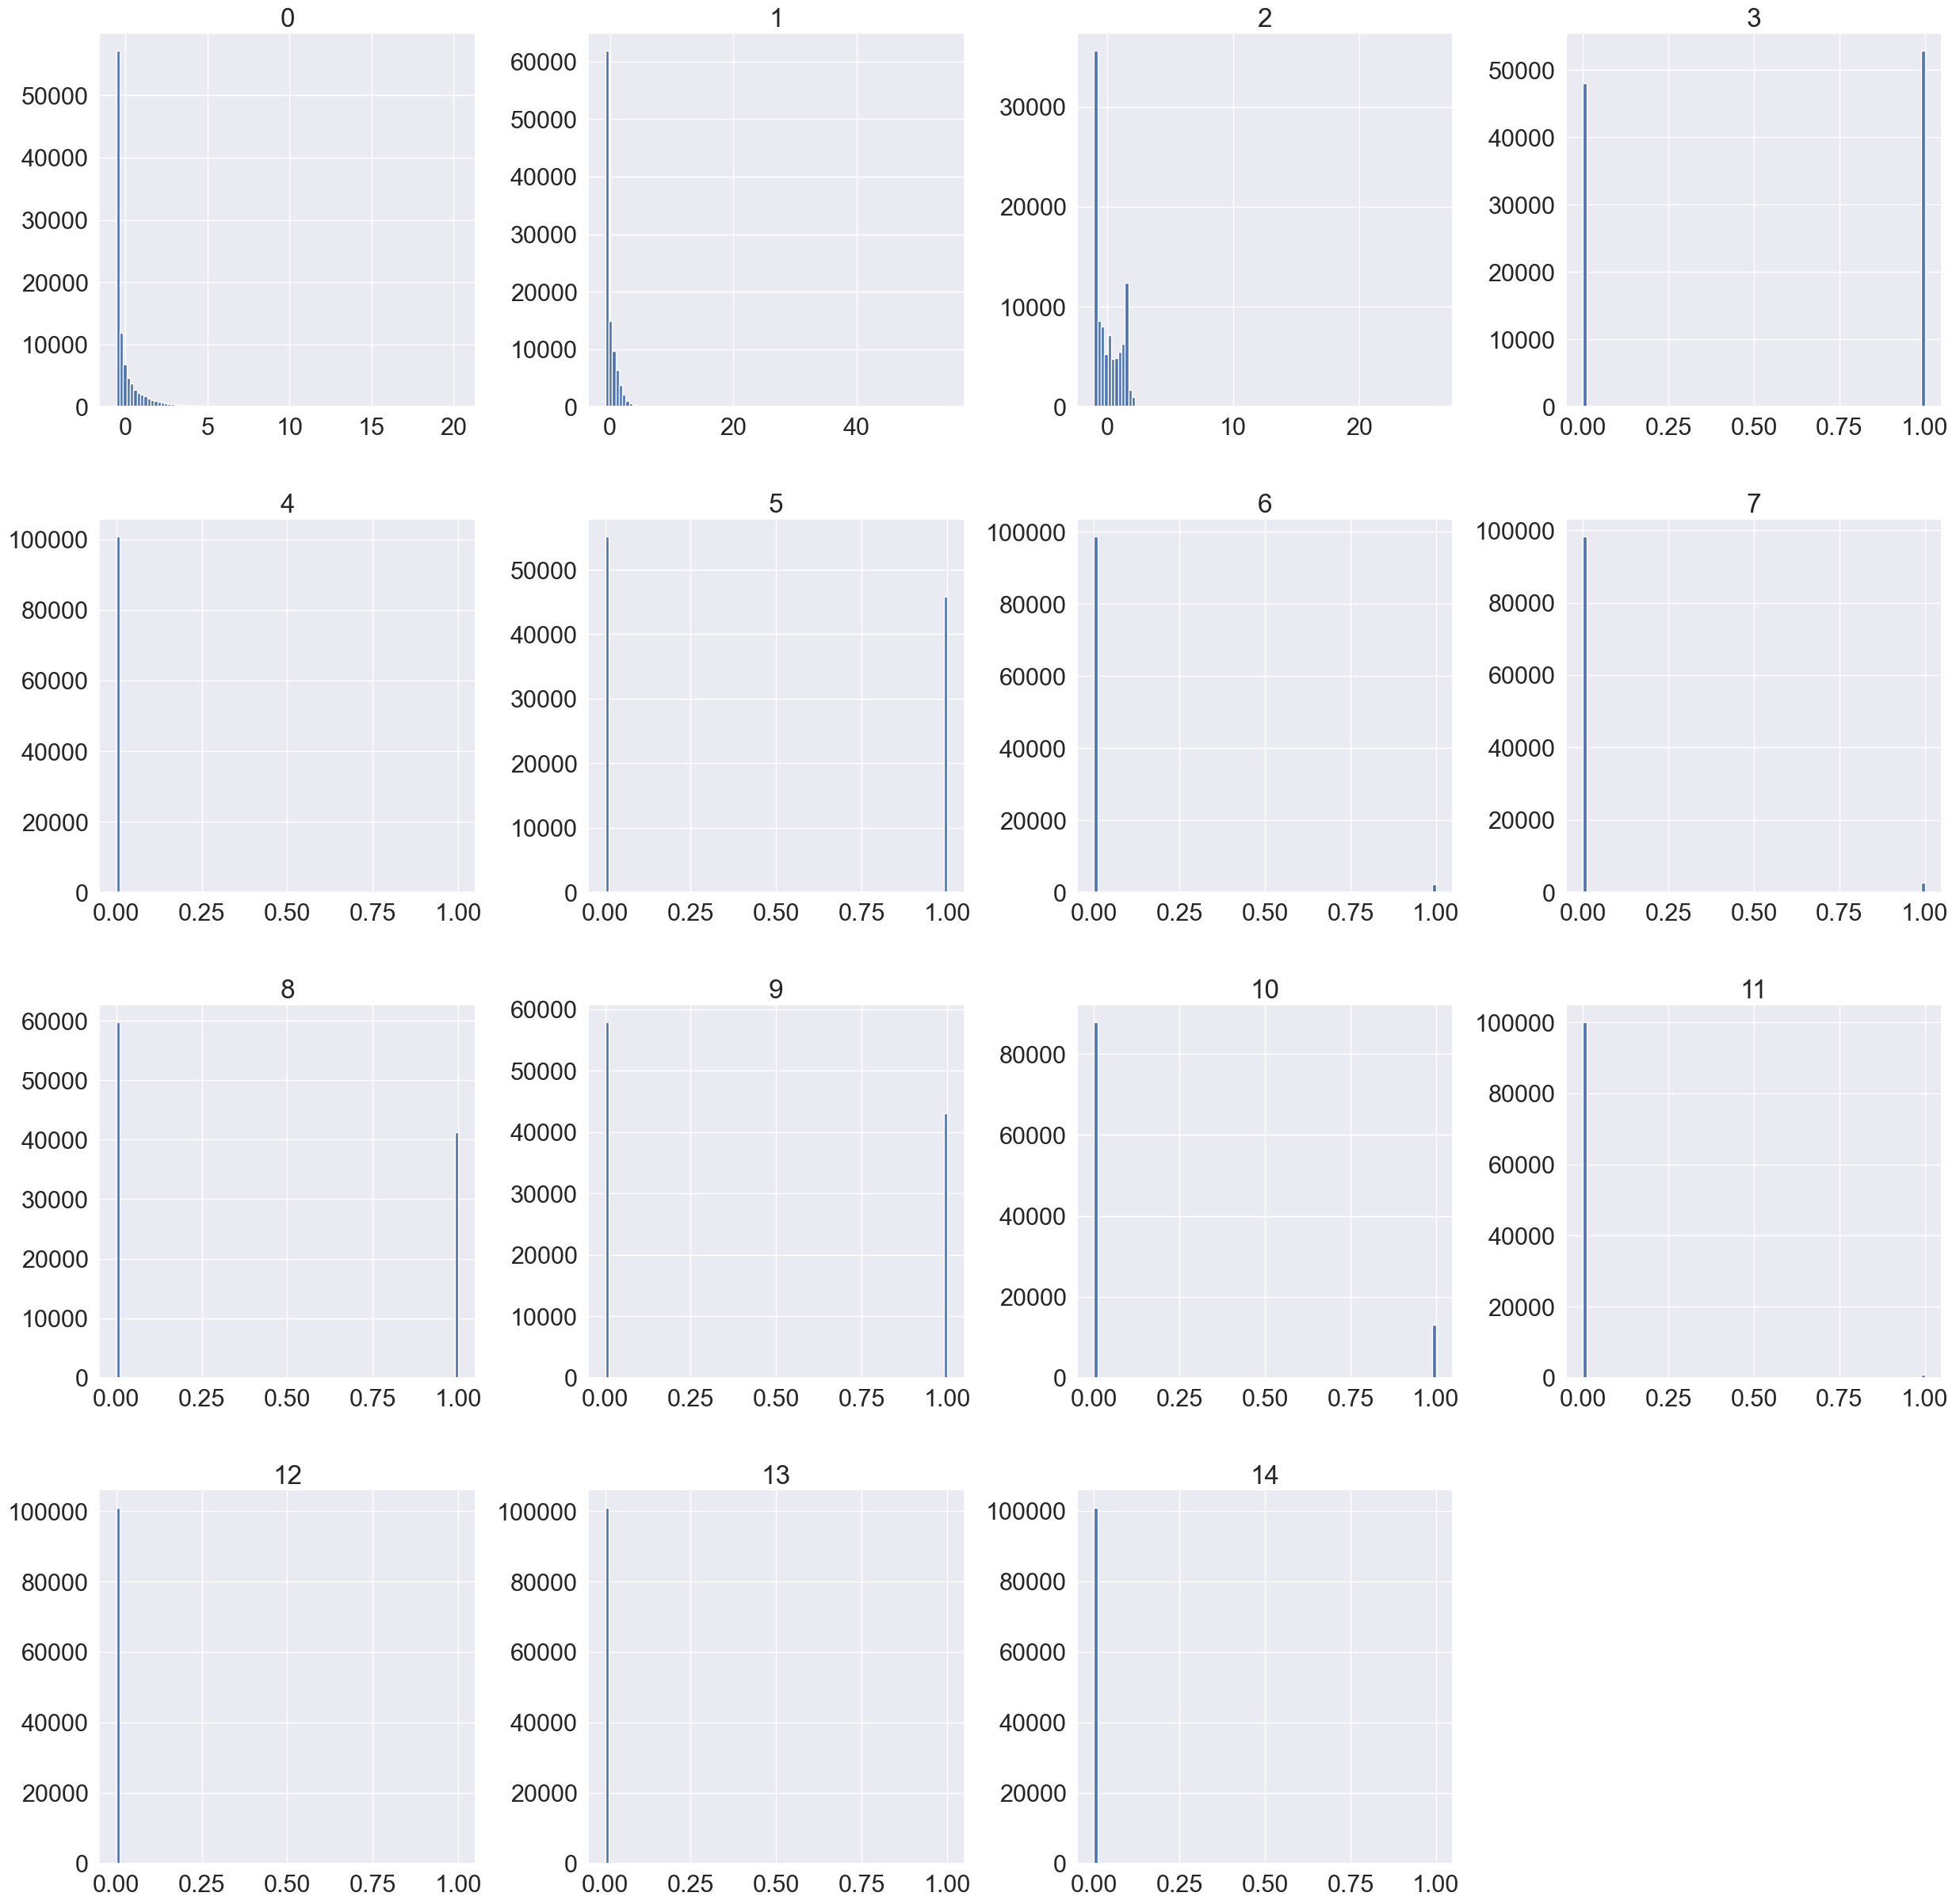

In [105]:
airbnb_prepared = full_pipeline.fit_transform(airbnb_df)
print(airbnb_prepared.shape) 

prep_df = pd.DataFrame(airbnb_prepared.toarray() if hasattr(airbnb_prepared, "toarray") else airbnb_prepared)
prep_df.hist(bins=100, figsize=(30,30))
plt.show()


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor


In [69]:
airbnb_features = airbnb_df.drop("price", axis=1)
airbnb_labels = airbnb_df["price"].copy()


In [70]:
num_attribs = [
    "number of reviews",
    "reviews per month",
    "availability 365",
    # any other numeric columns
]

cat_attribs = [
    "room type",
    "neighbourhood group",
    # any other categorical columns 
]


In [71]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # fill numeric NaNs
    ("scaler", StandardScaler())
])


In [72]:
cat_pipeline = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [73]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [74]:
airbnb_prepared = full_pipeline.fit_transform(airbnb_features)

print("Shape of pipeline output:", airbnb_prepared.shape)


Shape of pipeline output: (100945, 15)


In [75]:
print("NaNs in pipeline output:", np.isnan(airbnb_prepared).sum())


NaNs in pipeline output: 0


In [76]:
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)


In [77]:
from sklearn.linear_model import LinearRegression

model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=log_transformer  # or StandardScaler(), etc.
)
model.fit(airbnb_prepared, airbnb_labels)

# Predict on the first 5 rows of airbnb_prepared
predictions = model.predict(airbnb_prepared[:5])
print("Predictions:", predictions)


Predictions: [505.21201568 504.34087118 500.50946155 518.09042111 502.02608132]



# Custom Transformers


# Simple Custom Transformers with FunctionTransformer


In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
# This transforms x -> log(1 + x) and inverse x -> exp(x) - 1

log_reviews = log_transformer.transform(airbnb_df[["number of reviews"]])
print(log_reviews[:10])


   number of reviews
0           2.302585
1           3.828641
2           0.000000
3           5.602119
4           2.302585
5           4.317488
6           3.912023
7           3.912023
8           6.066108
9           4.779123


In [79]:
def ratio_func(X):
    # X should be 2D: first column is number_of_reviews, second is listings_count
    return X[:, [0]] / (X[:, [1]] + 1e-5)  # avoid div by zero

ratio_transformer = FunctionTransformer(ratio_func)

some_data = airbnb_df[["number of reviews", "calculated host listings count"]].values
ratio_out = ratio_transformer.transform(some_data)
print(ratio_out[:5])


[[  1.4999975 ]
 [ 22.4998875 ]
 [  0.        ]
 [269.99730003]
 [  8.99991   ]]


In [80]:
from sklearn.metrics.pairwise import rbf_kernel

def rbf_func(X, ref=[-74, 40.7], gamma=0.1):
    # X is lat/long array
    # Reshape ref to 2D if needed
    ref_2d = np.array(ref).reshape(1, -1)
    return rbf_kernel(X, ref_2d, gamma=gamma)

rbf_transformer = FunctionTransformer(rbf_func, kw_args={"ref":[-74,40.7],"gamma":0.1})

coords = airbnb_df[["long","lat"]].dropna().values
similarity = rbf_transformer.transform(coords)
print(similarity[:5])


[[0.99964799]
 [0.9996862 ]
 [0.99847507]
 [0.99981601]
 [0.99871669]]


# Custom ClusterSimilarity

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        # Fit KMeans on X
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, 
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        # Compute RBF similarity to each cluster center
        centers = self.kmeans_.cluster_centers_
        return rbf_kernel(X, centers, gamma=self.gamma)
    
    def get_feature_names_out(self, input_features=None):
        # Optionally name each dimension
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
coords = airbnb_df[["long","lat"]].dropna().values  # lat/long data
cluster_simil = ClusterSimilarity(n_clusters=8, gamma=0.1, random_state=42)

similarities = cluster_simil.fit_transform(coords)
print(similarities.shape)  # (num_rows, 8)


(100945, 8)


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(
            n_clusters=self.n_clusters,
            n_init=10,              # as recommended in the warning
            random_state=self.random_state
        )
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        centers = self.kmeans_.cluster_centers_
        # RBF kernel between X and the cluster centers
        return rbf_kernel(X, centers, gamma=self.gamma)

    def get_feature_names_out(self, input_features=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
        
df_coords = airbnb_df.dropna(subset=["long", "lat"]).copy()
print("Shape after dropping NaNs in lat/long:", df_coords.shape)


Shape after dropping NaNs in lat/long: (100945, 30)


In [84]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)

coords = df_coords[["long", "lat"]].values
similarities = cluster_simil.fit_transform(coords)  # shape (N, 10)
print("similarities shape:", similarities.shape)


similarities shape: (100945, 10)


In [85]:
max_sim = similarities.max(axis=1)  # shape (N,)

df_coords["Max cluster similarity"] = max_sim


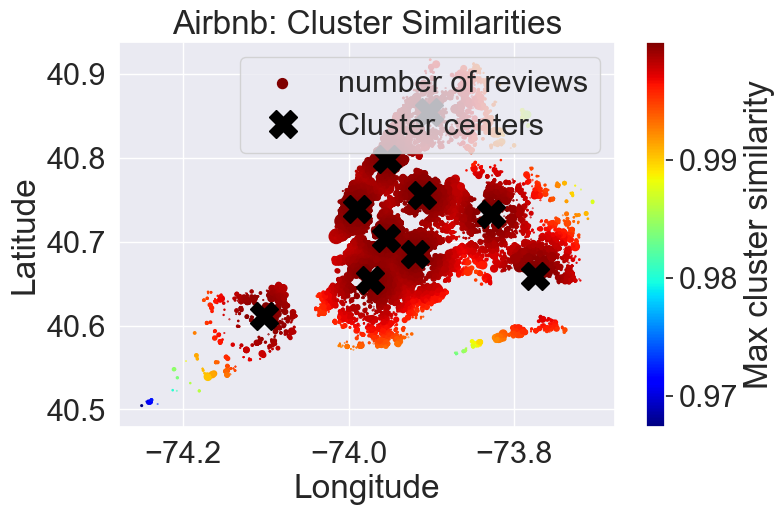

In [87]:
plt.figure(figsize=(8,5))

df_renamed.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    grid=True,
    s=df_renamed["number of reviews"] / 10,      # marker size
    label="number of reviews",
    c="Max cluster similarity",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    ax=plt.gca()  # plot on current axes
)

# Mark cluster centers
centers = cluster_simil.kmeans_.cluster_centers_
# centers shape: (10, 2) if we used [long, lat]
# But note that each row is [long, lat]
plt.plot(
    centers[:, 0], centers[:, 1],
    linestyle="", color="black", marker="X", markersize=20,
    label="Cluster centers"
)

plt.legend(loc="upper right")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Airbnb: Cluster Similarities")
plt.show()


A dense red zone appears around Manhattan and parts of Brooklyn, reflecting the large concentration of listings in those areas. Outlying listings, such as those in Staten Island or on the edges of Queens and the Bronx, show cooler colors, suggesting they are not near any main cluster center or are overshadowed by more central clusters. The black X’s, spaced out to minimize within-cluster distance in latitude/longitude, indicate where the algorithm placed multiple centers in Manhattan (where density is highest) and a few in the outer boroughs. Overall, this visualization highlights how each listing relates to its nearest cluster center: most points are red or orange because New York City is highly dense, so many listings are near a center, whereas green or blue points on the periphery are more isolated.

# Feature Encoding & Data Splitting


In [94]:
# Fit & Transform the Data

In [110]:
mean_impute_cols = [
    "reviews per month",
    "minimum nights",
    "availability 365",
    "calculated host listings count"
]

for col in mean_impute_cols:
    airbnb.loc[:, col] = airbnb[col].fillna(airbnb[col].mean())

median_impute_cols = [
    "number of reviews",
    "review rate number"
]

for col in median_impute_cols:
    airbnb.loc[:, col] = airbnb[col].fillna(airbnb[col].median())


In [159]:
# We plan to space out missing "last review" entries by 10 days each
increment_days = 10

airbnb["last review"] = pd.to_datetime(airbnb["last review"], errors="coerce")

# 'group_key' counts how many non-null dates have occurred so far, cumulatively
group_key = airbnb["last review"].notna().cumsum()

# For each group, determine how many missing rows have appeared and multiply by 10 days
date_offsets = pd.to_timedelta(
    airbnb.groupby(group_key).cumcount() * increment_days, 
    unit="d"
)

# Forward-fill existing dates, then add the offset to fill missing ones
airbnb["last review"] = airbnb["last review"].ffill() + date_offsets
airbnb.isnull().sum().sort_values()


id                                    0
calculated host listings count        0
review rate number                    0
reviews per month                     0
last review                           0
number of reviews                     0
minimum nights                        0
service fee                           0
price                                 0
Construction year                     0
availability 365                      0
room type                             0
instant_bookable                      0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
cancellation_policy                   0
house_rules                       51523
dtype: int64

In [160]:
# Display the count of unique values in 'host_identity_verified'
print(airbnb['host_identity_verified'].value_counts())

# Initialize a LabelEncoder instance
encoder = LabelEncoder()

# Apply encoding to convert categorical values into numerical form
airbnb['host_identity_verified'] = encoder.fit_transform(airbnb['host_identity_verified'])

# Verify encoding by checking the transformed value counts
print(airbnb['host_identity_verified'].value_counts())

# Mapping: 'unconfirmed' -> 0, 'verified' -> 1


host_identity_verified
unconfirmed    50607
verified       50526
Name: count, dtype: int64
host_identity_verified
0    50607
1    50526
Name: count, dtype: int64


In [161]:
# Check the distribution of 'instant_bookable' values
print(airbnb['instant_bookable'].value_counts())

# Initialize and apply Label Encoding to convert boolean values to integers
encoder = LabelEncoder()
airbnb['instant_bookable'] = encoder.fit_transform(airbnb['instant_bookable'])

# Display the transformed value counts
print(airbnb['instant_bookable'].value_counts())

# Mapping: False -> 0, True -> 1


instant_bookable
False    50794
True     50339
Name: count, dtype: int64
instant_bookable
0    50794
1    50339
Name: count, dtype: int64


In [162]:
# Extract columns with data type 'object' (categorical/text data)
airbnb.select_dtypes(include=['object'])


NAME    host name  \
0                     Clean & quiet apt home by the park     Madaline   
1                                  Skylit Midtown Castle        Jenna   
4       Entire Apt: Spacious Studio/Loft by central park       Lyndon   
5              Large Cozy 1 BR Apartment In Midtown East     Michelle   
7                                        BlissArtsSpace!         Emma   
...                                                  ...          ...   
102594                        Spare room in Williamsburg         Krik   
102595                     Best Location near Columbia U        Mifan   
102596                    Comfy, bright room in Brooklyn        Megan   
102597                  Big Studio-One Stop from Midtown  Christopher   
102598                              585 sf Luxury Studio      Rebecca   

       neighbourhood_group        neighbourhood cancellation_policy  \
0                 Brooklyn           Kensington              strict   
1                Manhattan              Midtown            moderate   
4                Manhattan          East Harlem            moderate   
5                Manhattan          Murray Hill            flexible   
7                 Brooklyn   Bedford-Stuyvesant            moderate   
...                    ...                  ...                 ...   
102594            Brooklyn         Williamsburg            flexible   
102595           Manhattan  Morningside Heights            moderate   
102596            Brooklyn           Park Slope            moderate   
102597              Queens     Long Island City              strict   
102598           Manhattan      Upper West Side            flexible   

              room type                                        house_rules  
0          Private room  Clean up and treat the home the way you'd like...  
1       Entire home/apt  Pet friendly but please confirm with me if the...  
4       Entire home/apt  Please no smoking in the house, porch or on th...  
5       Entire home/apt                  No smoking, please, and no drugs.  
7          Private room  House Guidelines for our BnB We are delighted ...  
...                 ...                                                ...  
102594     Private room  No Smoking No Parties or Events of any kind Pl...  
102595     Private room  House rules: Guests agree to the following ter...  
102596     Private room                                                NaN  
102597  Entire home/apt                                                NaN  
102598  Entire home/apt                                                NaN  

[101133 rows x 7 columns]

In [164]:
# Count occurrences of each category in 'cancellation_policy'
airbnb['cancellation_policy'].value_counts()

# Initialize and apply Label Encoding to 'cancellation_policy'
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
airbnb['cancellation_policy'] = encoder.fit_transform(airbnb['cancellation_policy'])

# Display updated counts after encoding
airbnb['cancellation_policy'].value_counts()




cancellation_policy
1    33888
2    33654
0    33591
Name: count, dtype: int64

In [165]:
# Display the count of each unique category in 'room type'
room_type_counts = airbnb['room type'].value_counts()
print(room_type_counts)

# Apply Label Encoding to convert categorical values into numeric values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
airbnb['room type'] = encoder.fit_transform(airbnb['room type'])

# Show the updated distribution after encoding
print(airbnb['room type'].value_counts())

# Encoding Mapping:
# 'Entire home/apt' → 0, 'Hotel room' → 1, 'Private room' → 2, 'Shared room' → 3


room type
Entire home/apt    52961
Private room       45856
Shared room         2200
Hotel room           116
Name: count, dtype: int64
room type
0    52961
2    45856
3     2200
1      116
Name: count, dtype: int64


In [166]:
# Display the count of each category in 'neighbourhood_group'
neighbourhood_counts = airbnb['neighbourhood_group'].value_counts()
print(neighbourhood_counts)

# Encode 'neighbourhood_group' using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
airbnb['neighbourhood_group'] = encoder.fit_transform(airbnb['neighbourhood_group'])

# Show the updated distribution after encoding
print(airbnb['neighbourhood_group'].value_counts())

# Encoding Mapping:
# 'Bronx' → 0, 'Brooklyn' → 1, 'Manhattan' → 2, 'Queens' → 3, 'Staten Island' → 4


neighbourhood_group
Manhattan        43177
Brooklyn         41228
Queens           13113
Bronx             2676
Staten Island      939
Name: count, dtype: int64
neighbourhood_group
2    43177
1    41228
3    13113
0     2676
4      939
Name: count, dtype: int64


In [168]:
# Duplicate the Airbnb dataset for further data splitting
data_subset = airbnb.copy()

# Preview the first few rows of the copied dataset
data_subset.head()

# Display the column names in the dataset
data_subset.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [176]:
split_data = airbnb.copy() 
# Selecting relevant columns for modeling
selected_features = [
    'host_identity_verified', 'neighbourhood_group', 'instant_bookable',
    'cancellation_policy', 'room type', 'Construction year',
    'minimum nights', 'number of reviews', 'reviews per month',
    'review rate number', 'calculated host listings count',
    'availability 365', 'price', 'service fee'
]

# Creating a subset of the dataset with selected features
split_data = split_data[selected_features]

# Separating features and target variable
X = split_data.drop(columns=['price']).values
y = split_data['price'].values

# Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Applying RobustScaler for normalization
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  


# Select and Train a Model


# Linear Regression Model

Training Score (R²): 0.9884


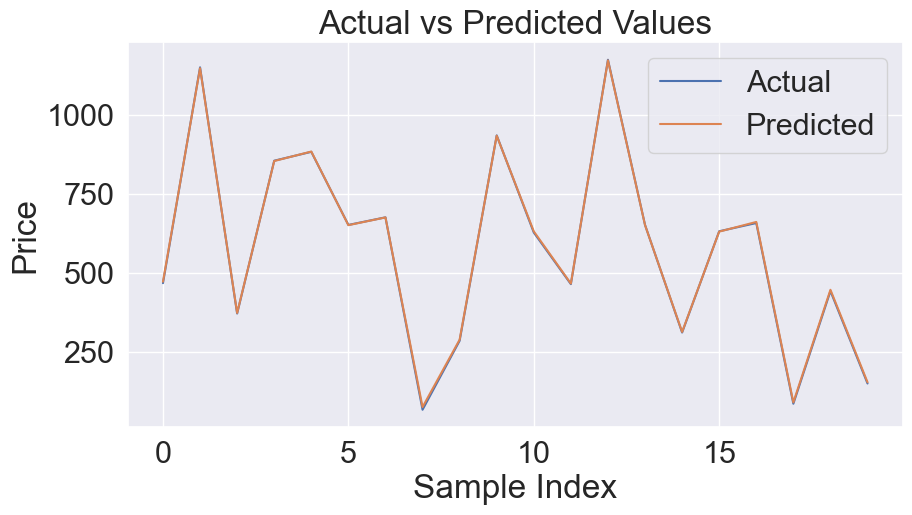

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def visualize_predictions(model, X_test, y_test):
    """Generate and plot actual vs predicted values."""
    y_pred = model.predict(X_test)
    results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    
    plt.figure(figsize=(10, 5))
    plt.plot(results_df[:20])  # Plot first 20 values for comparison
    plt.legend(['Actual', 'Predicted'])
    plt.title("Actual vs Predicted Values")
    plt.xlabel("Sample Index")
    plt.ylabel("Price")
    plt.show()

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Model performance evaluation
train_score = regressor.score(x_train, y_train)
print(f"Training Score (R²): {train_score:.4f}")

# Visualizing results
visualize_predictions(regressor, x_test, y_test)


In [186]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

train_score = linear_reg.score(x_train, y_train)
print(f"Training R² Score: {train_score:.6f}")

# Compute and display R² score for test data
test_score = linear_reg.score(x_test, y_test)
print(f"Test R² Score: {test_score:.6f}")

# Display the intercept of the regression model
print("Intercept:", linear_reg.intercept_)


Training R² Score: 0.988445
Test R² Score: 0.988747
Intercept: -22.01883305033732


In [203]:
feature_columns = [col for col in split_data.columns if col != 'price']

# Create a DataFrame with correct coefficients
coeff_df = pd.DataFrame(
    reg.coef_, 
    index=feature_columns,  
    columns=['Coefficient']
)

# Display the corrected coefficient DataFrame
print(coeff_df)


                                Coefficient
host_identity_verified             0.002976
neighbourhood_group                0.043375
instant_bookable                  -0.054909
cancellation_policy                0.034182
room type                          0.193460
Construction year                  0.014238
minimum nights                     0.010838
number of reviews                  0.000822
reviews per month                 -0.179686
review rate number                -0.015014
calculated host listings count     0.001122
availability 365                   0.000133
service fee                        4.957781


In [204]:
# Creating a DataFrame to store model coefficients
coefficients_df = pd.DataFrame({
    'Feature': split_data.columns[:-1],
    'Coefficient': reg.coef_
})

predictions = reg.predict(x_test)

# Creating a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predictions
})

results_df.head(10)


Actual    Predicted
0   468.0   472.627439
1  1150.0  1147.298611
2   372.0   373.837803
3   855.0   853.973319
4   883.0   883.938897
5   652.0   651.305423
6   676.0   675.721771
7    68.0    76.462661
8   286.0   289.466642
9   935.0   934.055137

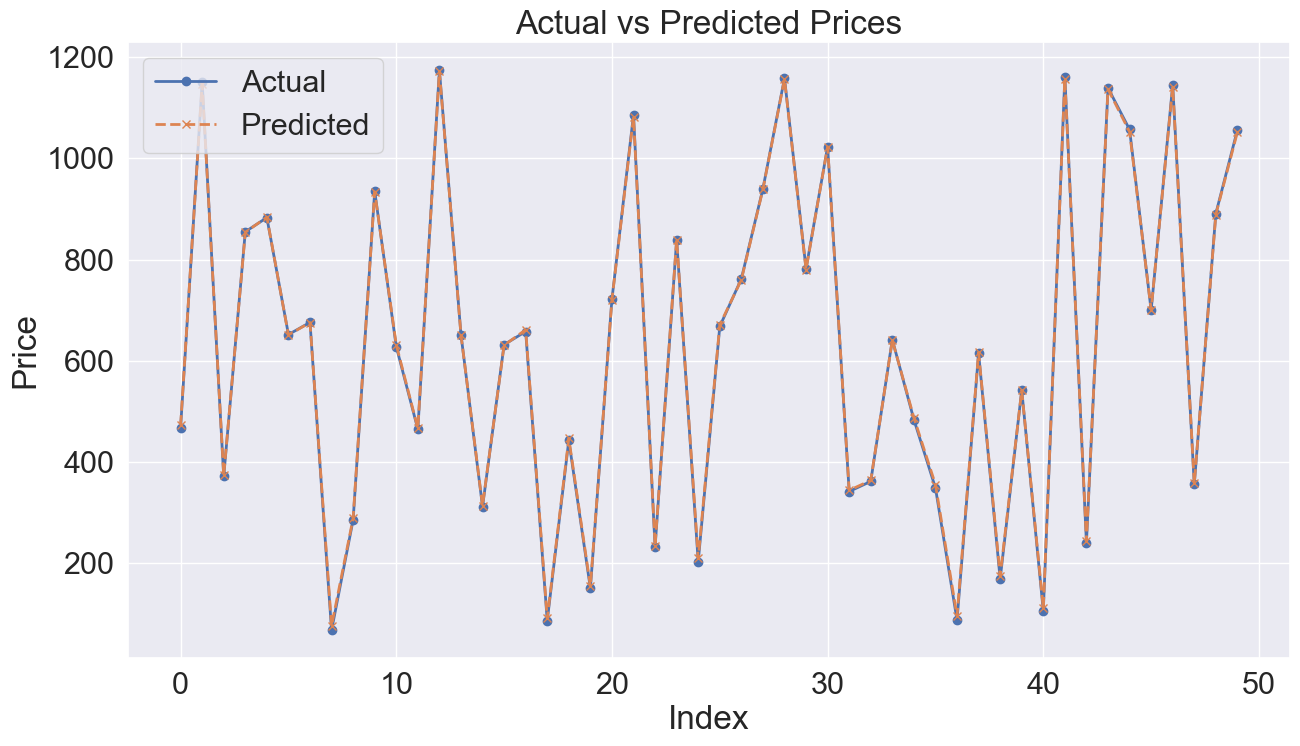

In [212]:
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(df["Actual"][:50], label="Actual", marker='o', linestyle='-', linewidth=2)

# Plot predicted values
plt.plot(df["Predicted"][:50], label="Predicted", marker='x', linestyle='--', linewidth=2)

plt.legend()
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [213]:
# Evaluating Linear Regression Model

# Compute R-squared score
reg_score = r2_score(y_test, y_pred)
print(f"R² Score: {reg_score:.6f}")

# Compute Adjusted R² Score
p = len(x_train[0])  # Number of predictors
n = len(y_train)      # Number of observations

adj_R2 = 1 - (1 - reg_score) * (n - 1) / (n - p - 1)
print(f"Adjusted R² Score: {adj_R2:.6f}")


R² Score: 0.988747
Adjusted R² Score: 0.988745


In [215]:
# Compare Adjusted R² with R² Score
print(f"Is Adjusted R² < R² Score? {adj_R2 < reg_score}")

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.6f}")

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Is Adjusted R² < R² Score? True
Mean Squared Error (MSE): 1237.3657
Mean Absolute Error (MAE): 4.4177
Mean Absolute Percentage Error (MAPE): 0.013879
Mean Squared Error (MSE): 1237.3657
Root Mean Squared Error (RMSE): 35.1762


# Linear Discriminant Analysis (LDA)

In [217]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# Compute training accuracy
lda_train_score = lda.score(x_train, y_train)
print(f"LDA Training Accuracy: {lda_train_score:.4f}")
# Compute test accuracy
lda_test_score = lda.score(x_test, y_test)
print(f"LDA Test Accuracy: {lda_test_score:.4f}")


LDA Training Accuracy: 0.0662
LDA Test Accuracy: 0.0377


The training accuracy (≈6.72%) and test accuracy (≈2.94%) are both very low, indicating that LDA is not performing well on this dataset. This suggests that LDA might not be the best model for this particular regression problem, as it is primarily designed for classification tasks.

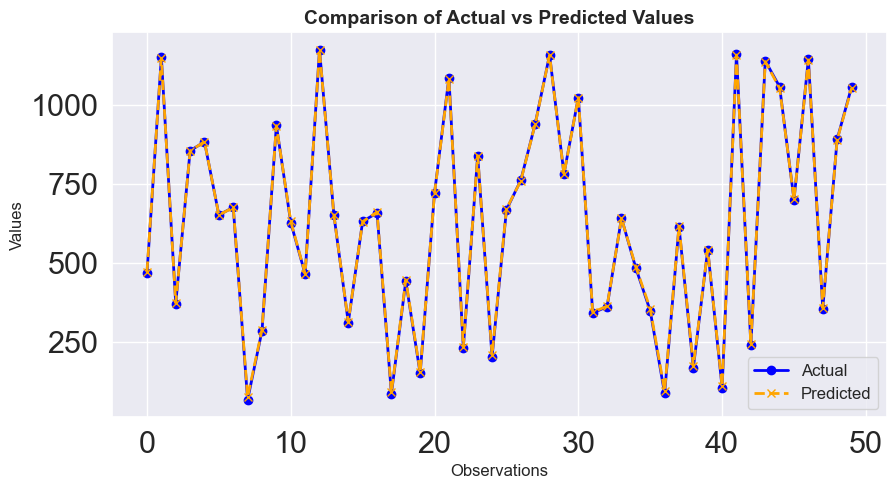

In [257]:
sns.set_style("darkgrid")

# Set figure size
plt.figure(figsize=(10, 5))

# Plot actual vs predicted values for the first 50 observations
plt.plot(df["Actual"][:50], label="Actual", linestyle='-', marker='o', markersize=6, linewidth=2, color='blue')
plt.plot(df["Predicted"][:50], label="Predicted", linestyle='--', marker='x', markersize=6, linewidth=2, color='orange')

# Add labels and title
plt.xlabel("Observations", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Comparison of Actual vs Predicted Values", fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()



In [267]:
# Evaluation of LDA
# Compute R² score for LDA model
lda_score = r2_score(y_test, y_pred)
print("LDA R² Score:", lda_score)

# Compute Adjusted R² Score
p = len(x_train[0])  # Number of predictors
n = len(y_train)      # Number of observations

adj_R2ld = 1 - (1 - lda_score) * (n - 1) / (n - p - 1)
print("LDA Adjusted R² Score:", adj_R2ld)

# Check if Adjusted R² is less than R²
print("Is Adjusted R² < R²?", adj_R2ld < lda_score)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Absolute Percentage Error (MAPE)
mpae = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mpae)
# Compute Root Mean Squared Error (RMSE)
reg_mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(reg_mse)
print("Root Mean Squared Error (RMSE):", reg_rmse)


LDA R² Score: 0.9887465609694233
LDA Adjusted R² Score: 0.9887446318508448
Is Adjusted R² < R²? True
Mean Squared Error (MSE): 1237.3657278795313
Mean Absolute Error (MAE): 4.417709002884293
Mean Absolute Percentage Error (MAPE): 0.013879418300112271
Root Mean Squared Error (RMSE): 35.17620968608658


# RandomForest Regressor

Training Score (R²): 0.999626941041616
Test Score (R²): 0.9974630914526672


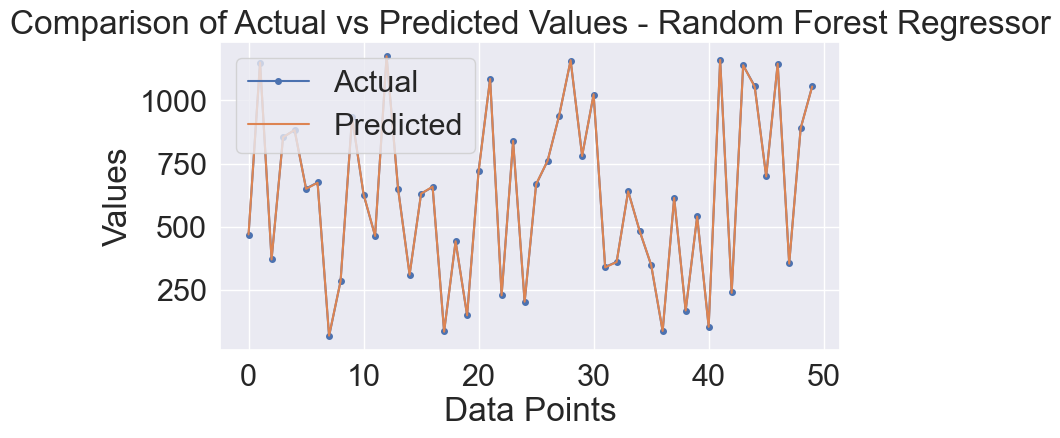

In [225]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Evaluate model performance on training data
train_score_rf = rf_model.score(x_train, y_train)
print("Training Score (R²):", train_score_rf)

# Evaluate model performance on test data
test_score_rf = rf_model.score(x_test, y_test)
print("Test Score (R²):", test_score_rf)

# Generate predictions
y_pred_rf = rf_model.predict(x_test)

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(y_test[:50], label="Actual", marker="o", markersize=4)
plt.plot(y_pred_rf[:50], label="Predicted", marker="x", markersize=0)
plt.legend()
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Comparison of Actual vs Predicted Values - Random Forest Regressor")
plt.show()


In [234]:
# Compute R² score for the test set
rf_score = r2_score(y_test, y_pred)  # Ensure y_test and y_pred are defined
rf_score

# Get total features and observations
num_features = len(x_train[0])  # Assuming x_train is a NumPy array or DataFrame
num_samples = len(y_train)  # Total number of training samples

# Adjusted R² calculation
adjusted_rf_score = 1 - (1 - rf_score) * (num_samples - 1) / (num_samples - num_features - 1)
adjusted_rf_score

# Compare Adjusted R² with regular R²
adjusted_rf_score < rf_score



True

In [236]:
print("R² Score:", rf_score)
print("Adjusted R² Score:", adjusted_rf_score)



R² Score: 0.9887465609694233
Adjusted R² Score: 0.9887446318508448


# Decision Tree Regressor

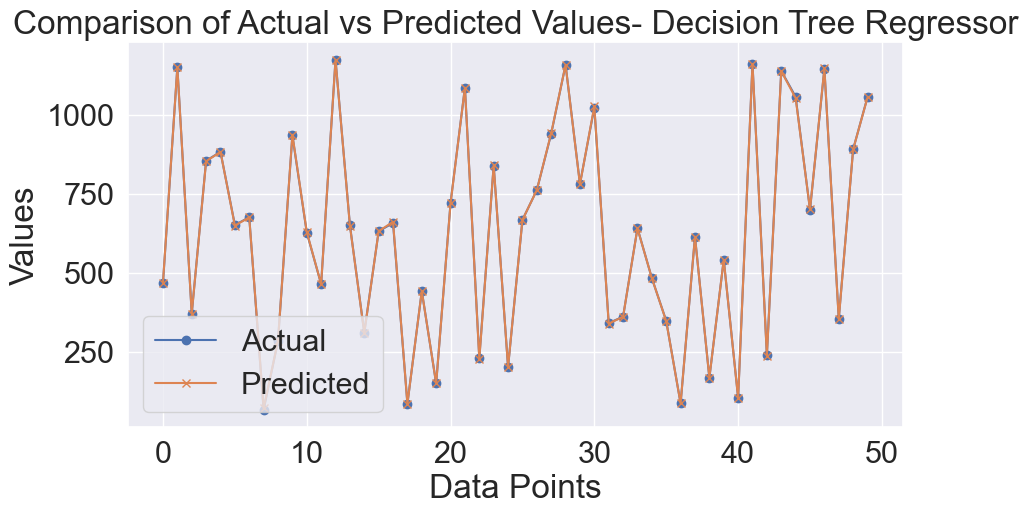

In [256]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Generate predictions
    df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

    # Plot the first 50 predictions
    plt.figure(figsize=(10, 5))
    plt.plot(df["Actual"][:50], marker='o', label="Actual")
    plt.plot(df["Predicted"][:50], marker='x', label="Predicted")

    # Add labels and title
    plt.xlabel("Data Points")
    plt.ylabel("Values")
    plt.title("Comparison of Actual vs Predicted Values- Decision Tree Regressor")
    plt.legend()
    plt.show()

plot_predictions(dt_model, x_test, y_test)


In [253]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
    
# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

# Evaluate performance on training data
train_score_dt = dt_model.score(x_train, y_train)
print("Training R² Score:", train_score_dt)

# Evaluate performance on test data
test_score_dt = dt_model.score(x_test, y_test)
print("Test R² Score:", test_score_dt)

# Generate predictions
y_pred_dt = dt_model.predict(x_test)

# Visualize actual vs predicted values
plot_predictions(dt_model, x_test, y_test)

# Compute R² score for test data
r2_dt = r2_score(y_test, y_pred_dt)
print("R² Score on Test Data:", r2_dt)

# Adjusted R² calculation
num_features_dt = len(x_train[0])
num_samples_dt = len(y_train)
adjusted_r2_dt = 1 - ((1 - r2_dt) * (num_samples_dt - 1) / (num_samples_dt - num_features_dt - 1))

print("Adjusted R² Score:", adjusted_r2_dt)
print("Adjusted R² < R²:", adjusted_r2_dt < r2_dt)

# Error metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Print error metrics
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Absolute Percentage Error (MAPE):", mape_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)


Training R² Score: 1.0
Test R² Score: 0.9951903593767584
R² Score on Test Data: 0.9951903593767584
Adjusted R² Score: 0.9951895348850579
Adjusted R² < R²: True
Mean Squared Error (MSE): 528.8414016769499
Mean Absolute Error (MAE): 1.9543584875810789
Mean Absolute Percentage Error (MAPE): 0.0056118778054282305
Root Mean Squared Error (RMSE): 22.99655195191118


# Comparison of Four Models


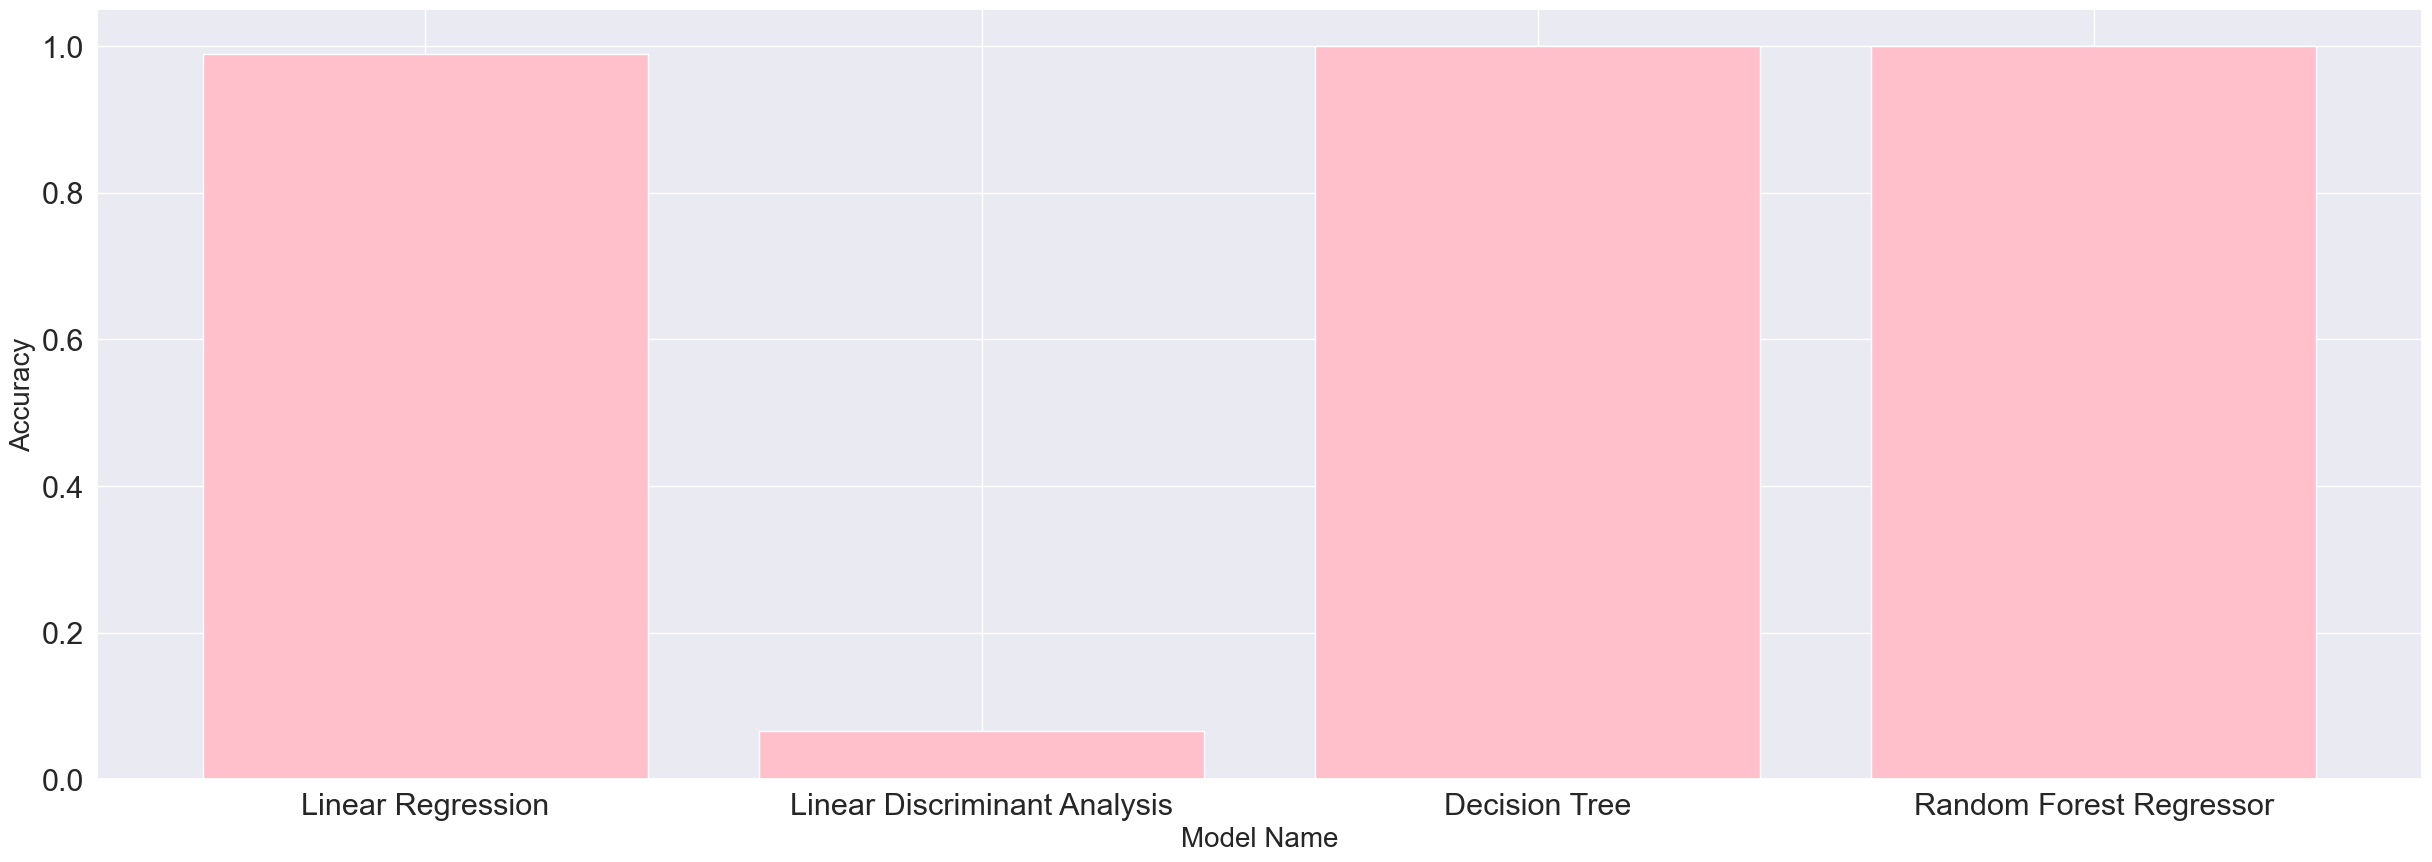

In [263]:
from sklearn.metrics import r2_score

# Train Linear Regression model
reg = LinearRegression()
lda = LinearDiscriminantAnalysis()
tdt = DecisionTreeRegressor().fit(x_train, y_train)
rf = RandomForestRegressor().fit(x_train, y_train)

reg.fit(x_train, y_train)
lda.fit(x_train, y_train)  

# Compute R² score
regv = r2_score(y_test, reg.predict(x_test))
ldav = lda.score(x_train, y_train) 
tdtv = tdt.score(x_train, y_train)
rfv = rf.score(x_train, y_train)

model_scores = {
    'Linear Regression': regv,
    'Linear Discriminant Analysis': ldav,
    'Decision Tree': tdtv,
    'Random Forest Regressor': rfv,
}

# Extract model names and accuracy values
model_names = list(model_scores.keys())
accuracy_values = list(model_scores.values())

# Set font size for better readability
plt.rc('font', size=20)

# Create a bar plot to visualize model accuracy
plt.figure(figsize=(30, 10))
plt.xlabel('Model Name', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Generate a bar chart using the accuracy values
plt.bar(range(len(model_scores)), accuracy_values, tick_label=model_names, color='pink')

# Display the plot
plt.show()
